# Part 11: Proportionality analysis of populations in T1D and Healthy

In this document, we analyze the frequencies of the populations and subpopulations in T1D patients and healhty donors. In the manuscript, we performed frequentist analysis, which is presented here, and Bayesian analysis, which is described in a separate GitHub [repository by @martinmodrak](https://github.com/martinmodrak/diabetes_populace). 

During the revision process, we added part focusing on the proportion of subpopulations in different age groups. 

In [1]:
# Loading of packages and scripts
source("diabetes_analysis_v07.R")

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges


Attaching package: ‘patchwork’


The following object is masked from ‘package:XML’:

    free


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘fs’


The following object is masked from ‘package:BiocGenerics’:

    path


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Attaching shinyBS

rgeos version: 0.6-4, (SVN revision 699)
 GEOS runtime version: 3.12.1-CAPI-1.18.1 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 GEOS using OverlayNG
 Linking to sp version: 2.1-2 
 Polygon checking: TRUE 


ggtree v3.12.0 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, pleas

## CD4 populations

In this part of the analysis, we will quantify the frequencies of Cd4 populations and subpopulation from parent and total counts. The resulting tables will be used for frequnetist and Bayesian analysis. 

We will load the CD4 dataset and add metadata to ensure that we are not losing patients with zero counts of cells in any subpopulations.

In [3]:
cd4_l1_full_filt  <- readRDS("../data/processed/L1/cd4_l1_full_filt.rds")

In [4]:
cd4_patient_meta  <- cd4_l1_full_filt@meta.data  %>% 
                            dplyr::select(Sample_ID, Condition, Condition2, 
                                          Disease, 
                                          Sex, Age, Age_group, Patient_ID, 
                                          Time, Experiment_ID)   %>% unique

We will calculate the frequencies of the Level3 subpopulations from total. 

In [6]:
df3  <- cd4_l1_full_filt@meta.data %>% 
  group_by(Sample_ID, annotations_l3) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
ungroup   %>% 
pivot_wider(names_from = "annotations_l3", values_from = "n", values_fill = 0) 
df_l3  <- left_join((cd4_l1_full_filt@misc$all_md %>% dplyr::select(Sample_ID) %>% unique), df3)
df_l3[is.na(df_l3)] <- 0
df_l3  <- df_l3  %>% pivot_longer(!Sample_ID, values_to = "n", names_to = "annotations")

# As we've lost non-grouping variables, let's join them back
md_to_join <- cd4_l1_full_filt@misc$all_md %>% 
  unique()

df_l3  <- left_join(df_l3, md_to_join)
df_l3$Level  <- "L3"

`summarise()` has grouped output by 'Sample_ID'. You can override using the
`.groups` argument.
Joining with `by = join_by(Sample_ID)`
Joining with `by = join_by(Sample_ID)`


Check the resulting table:

In [9]:
df_l3

Sample_ID,annotations,n,Condition,Condition2,Disease,Sex,Age,Age_group,Patient_ID,Time,Experiment_ID,Level
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
178,CD4 T cells---ISAGhi---ISAGhi2: CCR7 LEF1 SOX4,1,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L3
178,CD4 T cells---Naive---Naive1: AIF1 STMN1 EPHB6,335,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L3
178,CD4 T cells---Naive---Naive2: ITGA4 PIM1 PCED1B,60,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L3
178,CD4 T cells---Naive---Naive3: DUSP1 JUN FOS,263,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L3
178,CD4 T cells---Naive---Naive4: TRDC TRDV1 SOX4,3,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L3
178,CD4 T cells---Nfkb---Nfkb_1: PTGER2 LPAR6 TNFSF8,7,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L3
178,CD4 T cells---Proliferating---Prolif4: GZMK NUCB2 IL10,2,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L3
178,CD4 T cells---Temra---Temra3: CHI3L2 TIGIT CRTAM,1,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L3
178,CD4 T cells---Temra---Temra4: IGFBP7 FES LGALS9B,2,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L3


We will calculate the frequencies of the Level2 populations from total. 

In [10]:
df3  <- cd4_l1_full_filt@meta.data %>% 
  group_by(Sample_ID, annotations_l2) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
ungroup   %>% 
pivot_wider(names_from = "annotations_l2", values_from = "n", values_fill = 0) 
df_l2  <- left_join((cd4_l1_full_filt@misc$all_md %>% dplyr::select(Sample_ID) %>% unique), df3)
df_l2[is.na(df_l2)] <- 0
df_l2  <- df_l2  %>% pivot_longer(!Sample_ID, values_to = "n", names_to = "annotations")

# As we've lost non-grouping variables, let's join them back
md_to_join <- cd4_l1_full_filt@misc$all_md %>% 
  unique()

df_l2  <- left_join(df_l2, md_to_join)
df_l2$Level  <- "L2"

`summarise()` has grouped output by 'Sample_ID'. You can override using the
`.groups` argument.
Joining with `by = join_by(Sample_ID)`
Joining with `by = join_by(Sample_ID)`


Check the resulting table:

In [12]:
df_l2

Sample_ID,annotations,n,Condition,Condition2,Disease,Sex,Age,Age_group,Patient_ID,Time,Experiment_ID,Level
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
178,CD4 T cells---ISAGhi,1,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L2
178,CD4 T cells---Naive,661,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L2
178,CD4 T cells---Nfkb,7,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L2
178,CD4 T cells---Proliferating,2,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L2
178,CD4 T cells---Temra,3,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L2
178,CD4 T cells---Tfh,74,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L2
178,CD4 T cells---Th1Th17,3,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L2
178,CD4 T cells---Th2,19,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L2
178,CD4 T cells---Treg,15,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L2


Finally, will calculate the frequencies of the Level1 populations from total. 

In [13]:
df3  <- cd4_l1_full_filt@meta.data %>% 
  group_by(Sample_ID, annotations_l1) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
ungroup   %>% 
pivot_wider(names_from = "annotations_l1", values_from = "n", values_fill = 0) 
df_l1  <- left_join((cd4_l1_full_filt@misc$all_md %>% dplyr::select(Sample_ID) %>% unique), df3)
df_l1[is.na(df_l1)] <- 0
df_l1  <- df_l1  %>% pivot_longer(!Sample_ID, values_to = "n", names_to = "annotations")

# As we've lost non-grouping variables, let's join them back
md_to_join <- cd4_l1_full_filt@misc$all_md %>% 
  unique()

df_l1  <- left_join(df_l1, md_to_join)
df_l1$Level  <- "L1"

`summarise()` has grouped output by 'Sample_ID'. You can override using the
`.groups` argument.
Joining with `by = join_by(Sample_ID)`
Joining with `by = join_by(Sample_ID)`


Check the resulting table:

In [14]:
df_l1

Sample_ID,annotations,n,Condition,Condition2,Disease,Sex,Age,Age_group,Patient_ID,Time,Experiment_ID,Level
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
178,CD4 T cells---ISAGhi---ISAGhi2: CCR7 LEF1 SOX4,1,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L3
178,CD4 T cells---Naive---Naive1: AIF1 STMN1 EPHB6,335,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L3
178,CD4 T cells---Naive---Naive2: ITGA4 PIM1 PCED1B,60,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L3
178,CD4 T cells---Naive---Naive3: DUSP1 JUN FOS,263,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L3
178,CD4 T cells---Naive---Naive4: TRDC TRDV1 SOX4,3,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L3
178,CD4 T cells---Nfkb---Nfkb_1: PTGER2 LPAR6 TNFSF8,7,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L3
178,CD4 T cells---Proliferating---Prolif4: GZMK NUCB2 IL10,2,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L3
178,CD4 T cells---Temra---Temra3: CHI3L2 TIGIT CRTAM,1,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L3
178,CD4 T cells---Temra---Temra4: IGFBP7 FES LGALS9B,2,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L3


Now let's bind the tables with the three levels of populations into one table.

In [15]:
df_all_levels  <- rbind(df_l1, df_l2, df_l3)

In [16]:
all_counts  <- df_all_levels

We will also add the frequency of total for each population and level. 

In [17]:
df3  <- all_counts %>% 
  group_by(Sample_ID, Level) %>% 
  mutate(freq_from_total = n / sum(n)) 

In [18]:
df3

Sample_ID,annotations,n,Condition,Condition2,Disease,Sex,Age,Age_group,Patient_ID,Time,Experiment_ID,Level,freq_from_total
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
178,CD4 T cells,785,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L1,0.988664987
178,CD4 Unconventional T cells,9,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L1,0.011335013
181,CD4 T cells,763,Dia T0,Part_remission_0,Dia,F,1.4,1,106,T0,Exp10,L1,0.990909091
181,CD4 Unconventional T cells,7,Dia T0,Part_remission_0,Dia,F,1.4,1,106,T0,Exp10,L1,0.009090909
179,CD4 T cells,776,Dia T0,Part_remission_1,Dia,M,9.4,2,110,T0,Exp10,L1,0.989795918
179,CD4 Unconventional T cells,8,Dia T0,Part_remission_1,Dia,M,9.4,2,110,T0,Exp10,L1,0.010204082
183,CD4 T cells,791,Dia T0,Part_remission_1,Dia,F,11.0,2,111,T0,Exp10,L1,0.992471769
183,CD4 Unconventional T cells,6,Dia T0,Part_remission_1,Dia,F,11.0,2,111,T0,Exp10,L1,0.007528231
182,CD4 T cells,776,Dia T0,Part_remission_1,Dia,F,7.8,2,108,T0,Exp10,L1,0.996148909


To calculate the frequency of parent, we need to set the parent population for each subpopulation.

In [20]:
df3  <- df3  %>% separate(annotations, into = c("annot_l1","annot_l2",NA), sep = "---", remove = F)  %>% 
mutate(Parent_annotation = case_when(
Level == "L1" ~ "CD4",
Level == "L2" ~ annot_l1,
Level == "L3" ~ paste0(annot_l1, "---" ,annot_l2)
))

Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 1044 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [21]:
df3

Sample_ID,annotations,annot_l1,annot_l2,n,Condition,Condition2,Disease,Sex,Age,Age_group,Patient_ID,Time,Experiment_ID,Level,freq_from_total,Parent_annotation
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
178,CD4 T cells,CD4 T cells,NA,785,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L1,0.988664987,CD4
178,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,9,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L1,0.011335013,CD4
181,CD4 T cells,CD4 T cells,NA,763,Dia T0,Part_remission_0,Dia,F,1.4,1,106,T0,Exp10,L1,0.990909091,CD4
181,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,7,Dia T0,Part_remission_0,Dia,F,1.4,1,106,T0,Exp10,L1,0.009090909,CD4
179,CD4 T cells,CD4 T cells,NA,776,Dia T0,Part_remission_1,Dia,M,9.4,2,110,T0,Exp10,L1,0.989795918,CD4
179,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,8,Dia T0,Part_remission_1,Dia,M,9.4,2,110,T0,Exp10,L1,0.010204082,CD4
183,CD4 T cells,CD4 T cells,NA,791,Dia T0,Part_remission_1,Dia,F,11.0,2,111,T0,Exp10,L1,0.992471769,CD4
183,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,6,Dia T0,Part_remission_1,Dia,F,11.0,2,111,T0,Exp10,L1,0.007528231,CD4
182,CD4 T cells,CD4 T cells,NA,776,Dia T0,Part_remission_1,Dia,F,7.8,2,108,T0,Exp10,L1,0.996148909,CD4


Next, we will calculate the total count per parent population for each level and each patient.

In [23]:
levels_l1  <- all_counts %>% 
  filter(Level == "L1")  %>% 
pull(annotations)  %>% unique
levels_l2  <- all_counts %>% 
  filter(Level == "L2")  %>% 
pull(annotations)  %>% unique

We will iterate through level 1 annotations and level 2 annotation to obtain total counts per patient.

In [24]:
for(i in 1:length(levels_l1)) {
    
    df_filt  <- df3  %>% filter(grepl(annotations, pattern = levels_l1[i]) & Level == "L2")

    df_filt  <- df_filt  %>% 
            group_by(Sample_ID)  %>% 
        summarise(total_per_patient = sum(n))

    df_filt$Level = "L2"

    df_filt$Parent_annotation = levels_l1[i]

    if(i > 1){
       
        df_sum_of_parent  <- rbind(df_sum_of_parent, df_filt)
        
    } else {
        df_sum_of_parent  <- df_filt
    }

}

for(i in 1:length(levels_l2)) {
    
    df_filt  <- df3  %>% filter(grepl(annotations, pattern = levels_l2[i]) & Level == "L3")

    df_filt  <- df_filt  %>% 
            group_by(Sample_ID)  %>% 
        summarise(total_per_patient = sum(n))

    df_filt$Level = "L3"

    df_filt$Parent_annotation = levels_l2[i]

    df_sum_of_parent  <- rbind(df_sum_of_parent, df_filt)
   

}

Check the resulting table:

In [25]:
df_sum_of_parent

Sample_ID,total_per_patient,Level,Parent_annotation
<int>,<int>,<chr>,<chr>
178,785,L2,CD4 T cells
179,776,L2,CD4 T cells
180,712,L2,CD4 T cells
181,763,L2,CD4 T cells
182,776,L2,CD4 T cells
183,791,L2,CD4 T cells
195,501,L2,CD4 T cells
196,1314,L2,CD4 T cells
197,622,L2,CD4 T cells


Now, let's join the total counts to our previous table. 

In [27]:
df4  <- left_join(df3, df_sum_of_parent)

Joining with `by = join_by(Sample_ID, Level, Parent_annotation)`


As we now have the counts of both the population itself and the parent population per each sample, we can calculate the frequency from parent population.  

In [30]:
df4$freq_from_parent  <- df4$n/df4$total_per_patient

Check the resulting table:

In [31]:
df4

Sample_ID,annotations,annot_l1,annot_l2,n,Condition,Condition2,Disease,Sex,Age,Age_group,Patient_ID,Time,Experiment_ID,Level,freq_from_total,Parent_annotation,total_per_patient,freq_from_parent
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>
178,CD4 T cells,CD4 T cells,NA,785,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L1,0.988664987,CD4,NA,NA
178,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,9,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp10,L1,0.011335013,CD4,NA,NA
181,CD4 T cells,CD4 T cells,NA,763,Dia T0,Part_remission_0,Dia,F,1.4,1,106,T0,Exp10,L1,0.990909091,CD4,NA,NA
181,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,7,Dia T0,Part_remission_0,Dia,F,1.4,1,106,T0,Exp10,L1,0.009090909,CD4,NA,NA
179,CD4 T cells,CD4 T cells,NA,776,Dia T0,Part_remission_1,Dia,M,9.4,2,110,T0,Exp10,L1,0.989795918,CD4,NA,NA
179,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,8,Dia T0,Part_remission_1,Dia,M,9.4,2,110,T0,Exp10,L1,0.010204082,CD4,NA,NA
183,CD4 T cells,CD4 T cells,NA,791,Dia T0,Part_remission_1,Dia,F,11.0,2,111,T0,Exp10,L1,0.992471769,CD4,NA,NA
183,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,6,Dia T0,Part_remission_1,Dia,F,11.0,2,111,T0,Exp10,L1,0.007528231,CD4,NA,NA
182,CD4 T cells,CD4 T cells,NA,776,Dia T0,Part_remission_1,Dia,F,7.8,2,108,T0,Exp10,L1,0.996148909,CD4,NA,NA


We will convert frequencies to percentage and add zeroes to subpopulations where parent population has zero count.

In [32]:
df4$pct_from_total  <- df4$freq_from_total*100
df4$pct_from_parent  <- df4$freq_from_parent*100


In [33]:
df4$freq_from_parent <- ifelse(is.na(df4$freq_from_parent) & df4$Level != "L1", 0, df4$freq_from_parent)
df4$pct_from_parent  <- ifelse(is.na(df4$pct_from_parent) & df4$Level != "L1", 0, df4$pct_from_parent)

Check the resulting table:

In [34]:
df4

Sample_ID,annotations,annot_l1,annot_l2,n,Condition,Condition2,Disease,Sex,Age,⋯,Patient_ID,Time,Experiment_ID,Level,freq_from_total,Parent_annotation,total_per_patient,freq_from_parent,pct_from_total,pct_from_parent
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>
178,CD4 T cells,CD4 T cells,NA,785,Dia T0,Part_remission_1,Dia,M,3.7,⋯,105,T0,Exp10,L1,0.988664987,CD4,NA,NA,98.8664987,NA
178,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,9,Dia T0,Part_remission_1,Dia,M,3.7,⋯,105,T0,Exp10,L1,0.011335013,CD4,NA,NA,1.1335013,NA
181,CD4 T cells,CD4 T cells,NA,763,Dia T0,Part_remission_0,Dia,F,1.4,⋯,106,T0,Exp10,L1,0.990909091,CD4,NA,NA,99.0909091,NA
181,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,7,Dia T0,Part_remission_0,Dia,F,1.4,⋯,106,T0,Exp10,L1,0.009090909,CD4,NA,NA,0.9090909,NA
179,CD4 T cells,CD4 T cells,NA,776,Dia T0,Part_remission_1,Dia,M,9.4,⋯,110,T0,Exp10,L1,0.989795918,CD4,NA,NA,98.9795918,NA
179,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,8,Dia T0,Part_remission_1,Dia,M,9.4,⋯,110,T0,Exp10,L1,0.010204082,CD4,NA,NA,1.0204082,NA
183,CD4 T cells,CD4 T cells,NA,791,Dia T0,Part_remission_1,Dia,F,11.0,⋯,111,T0,Exp10,L1,0.992471769,CD4,NA,NA,99.2471769,NA
183,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,6,Dia T0,Part_remission_1,Dia,F,11.0,⋯,111,T0,Exp10,L1,0.007528231,CD4,NA,NA,0.7528231,NA
182,CD4 T cells,CD4 T cells,NA,776,Dia T0,Part_remission_1,Dia,F,7.8,⋯,108,T0,Exp10,L1,0.996148909,CD4,NA,NA,99.6148909,NA


We have the table with frequencies of CD4 subpopulations prepared, so we will save it and perform the same analysis for CD8 T cells. The CD4 subpopulations are stored in `freq_cd4`. 

In [35]:
freq_cd4  <- df4

## CD8 populations

The process for CD8 T cells is the same as for CD4 T cells. For comments, see above. 

In [36]:
cd8_l1_full_filt  <- readRDS("../data/processed/L1/cd8_l1_full_filt.rds")

In [37]:
cd8_patient_meta  <- cd8_l1_full_filt@meta.data  %>% 
                            dplyr::select(Sample_ID, Condition, Condition2, 
                                          Disease, 
                                          Sex, Age, Age_group, Patient_ID, 
                                          Time, Experiment_ID)   %>% unique

In [39]:
df3  <- cd8_l1_full_filt@meta.data %>% 
  group_by(Sample_ID, annotations_l3) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
ungroup   %>% 
pivot_wider(names_from = "annotations_l3", values_from = "n", values_fill = 0) 
df4  <- left_join((cd8_l1_full_filt@misc$all_md %>% dplyr::select(Sample_ID) %>% unique), df3)
df4[is.na(df4)] <- 0
df4  <- df4  %>% pivot_longer(!Sample_ID, values_to = "n", names_to = "annotations")

# As we've lost non-grouping variables, let's join them back
md_to_join <- cd8_l1_full_filt@misc$all_md %>% 
  unique()

df4  <- left_join(df4, md_to_join)

`summarise()` has grouped output by 'Sample_ID'. You can override using the
`.groups` argument.
Joining with `by = join_by(Sample_ID)`
Joining with `by = join_by(Sample_ID)`


In [40]:
df4$Level  <- "L3"

In [41]:
df_l3  <- df4

In [42]:
df3  <- cd8_l1_full_filt@meta.data %>% 
  group_by(Sample_ID, annotations_l2) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
ungroup   %>% 
pivot_wider(names_from = "annotations_l2", values_from = "n", values_fill = 0) 
df4  <- left_join((cd8_l1_full_filt@misc$all_md %>% dplyr::select(Sample_ID) %>% unique), df3)
df4[is.na(df4)] <- 0
df4  <- df4  %>% pivot_longer(!Sample_ID, values_to = "n", names_to = "annotations")

# As we've lost non-grouping variables, let's join them back
md_to_join <- cd8_l1_full_filt@misc$all_md %>% 
  unique()

df4  <- left_join(df4, md_to_join)
df4$Level  <- "L2"

`summarise()` has grouped output by 'Sample_ID'. You can override using the
`.groups` argument.
Joining with `by = join_by(Sample_ID)`
Joining with `by = join_by(Sample_ID)`


In [43]:
df_l2  <- df4

In [44]:
df4

Sample_ID,annotations,n,Condition,Condition2,Disease,Sex,Age,Age_group,Patient_ID,Time,Experiment_ID,Level
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
150,CD8 NK cells---NK cells,2,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L2
150,CD8 T cells---Naive,789,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L2
150,CD8 T cells---Proliferating,3,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L2
150,CD8 T cells---Tcm,12,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L2
150,CD8 T cells---Tem,86,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L2
150,CD8 T cells---Temra,10,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L2
150,CD8 Unconventional T cells---MAIT cells,2,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L2
150,CD8 Unconventional T cells---gd T cells,0,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L2
153,CD8 NK cells---NK cells,4,Dia T0,Part_remission_0,Dia,F,1.4,1,106,T0,Exp08,L2


In [45]:
df3  <- cd8_l1_full_filt@meta.data %>% 
  group_by(Sample_ID, annotations_l1) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
ungroup   %>% 
pivot_wider(names_from = "annotations_l1", values_from = "n", values_fill = 0) 
df4  <- left_join((cd8_l1_full_filt@misc$all_md %>% dplyr::select(Sample_ID) %>% unique), df3)
df4[is.na(df4)] <- 0
df4  <- df4  %>% pivot_longer(!Sample_ID, values_to = "n", names_to = "annotations")

# As we've lost non-grouping variables, let's join them back
md_to_join <- cd8_l1_full_filt@misc$all_md %>% 
  unique()

df4  <- left_join(df4, md_to_join)
df4$Level  <- "L1"

df_l1  <- df4

`summarise()` has grouped output by 'Sample_ID'. You can override using the
`.groups` argument.
Joining with `by = join_by(Sample_ID)`
Joining with `by = join_by(Sample_ID)`


In [46]:
df_l3

Sample_ID,annotations,n,Condition,Condition2,Disease,Sex,Age,Age_group,Patient_ID,Time,Experiment_ID,Level
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
150,CD8 NK cells---NK cells---NK3: DUSP2 CXCR4 CD69,1,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L3
150,CD8 NK cells---NK cells---NK4: GZMK IL7R XCL1,1,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L3
150,CD8 T cells---Naive---Naive1: GIMAP4 GIMAP7 DDX17,245,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L3
150,CD8 T cells---Naive---Naive2: DUSP1 JUN FOS,491,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L3
150,CD8 T cells---Naive---Naive3: SOX4 STMN1 CHI3L2,51,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L3
150,CD8 T cells---Naive---Naive4: IFI44L ISG15 MX1,2,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L3
150,CD8 T cells---Proliferating---Prolif3: CCR7 LEF1 GPR183,3,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L3
150,CD8 T cells---Tcm---Tcm1: CCR7 LEF1 NELL2,9,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L3
150,CD8 T cells---Tcm---Tcm4: CCR9 KLRC1 NT5E,1,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L3


In [47]:
df_all_levels  <- rbind(df_l1, df_l2, df_l3)

In [48]:
df_all_levels

Sample_ID,annotations,n,Condition,Condition2,Disease,Sex,Age,Age_group,Patient_ID,Time,Experiment_ID,Level
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
150,CD8 NK cells,2,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L1
150,CD8 T cells,900,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L1
150,CD8 Unconventional T cells,2,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L1
153,CD8 NK cells,4,Dia T0,Part_remission_0,Dia,F,1.4,1,106,T0,Exp08,L1
153,CD8 T cells,869,Dia T0,Part_remission_0,Dia,F,1.4,1,106,T0,Exp08,L1
153,CD8 Unconventional T cells,6,Dia T0,Part_remission_0,Dia,F,1.4,1,106,T0,Exp08,L1
152,CD8 NK cells,18,Dia T0,Part_remission_1,Dia,M,16.5,3,104,T0,Exp08,L1
152,CD8 T cells,889,Dia T0,Part_remission_1,Dia,M,16.5,3,104,T0,Exp08,L1
152,CD8 Unconventional T cells,20,Dia T0,Part_remission_1,Dia,M,16.5,3,104,T0,Exp08,L1


In [49]:
all_counts  <- df_all_levels

In [50]:
df3  <- all_counts %>% 
  group_by(Sample_ID, Level) %>% 
  mutate(freq_from_total = n / sum(n)) 

In [51]:
df3

Sample_ID,annotations,n,Condition,Condition2,Disease,Sex,Age,Age_group,Patient_ID,Time,Experiment_ID,Level,freq_from_total
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
150,CD8 NK cells,2,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L1,0.002212389
150,CD8 T cells,900,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L1,0.995575221
150,CD8 Unconventional T cells,2,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L1,0.002212389
153,CD8 NK cells,4,Dia T0,Part_remission_0,Dia,F,1.4,1,106,T0,Exp08,L1,0.004550626
153,CD8 T cells,869,Dia T0,Part_remission_0,Dia,F,1.4,1,106,T0,Exp08,L1,0.988623436
153,CD8 Unconventional T cells,6,Dia T0,Part_remission_0,Dia,F,1.4,1,106,T0,Exp08,L1,0.006825939
152,CD8 NK cells,18,Dia T0,Part_remission_1,Dia,M,16.5,3,104,T0,Exp08,L1,0.019417476
152,CD8 T cells,889,Dia T0,Part_remission_1,Dia,M,16.5,3,104,T0,Exp08,L1,0.959007551
152,CD8 Unconventional T cells,20,Dia T0,Part_remission_1,Dia,M,16.5,3,104,T0,Exp08,L1,0.021574973


In [53]:
df3  <- df3  %>% separate(annotations, into = c("annot_l1","annot_l2",NA), sep = "---", remove = F)  %>% 
mutate(Parent_annotation = case_when(
Level == "L1" ~ "CD8",
Level == "L2" ~ annot_l1,
Level == "L3" ~ paste0(annot_l1, "---" ,annot_l2)
))

Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 957 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [54]:
df3

Sample_ID,annotations,annot_l1,annot_l2,n,Condition,Condition2,Disease,Sex,Age,Age_group,Patient_ID,Time,Experiment_ID,Level,freq_from_total,Parent_annotation
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
150,CD8 NK cells,CD8 NK cells,NA,2,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L1,0.002212389,CD8
150,CD8 T cells,CD8 T cells,NA,900,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L1,0.995575221,CD8
150,CD8 Unconventional T cells,CD8 Unconventional T cells,NA,2,Dia T0,Part_remission_1,Dia,M,3.7,1,105,T0,Exp08,L1,0.002212389,CD8
153,CD8 NK cells,CD8 NK cells,NA,4,Dia T0,Part_remission_0,Dia,F,1.4,1,106,T0,Exp08,L1,0.004550626,CD8
153,CD8 T cells,CD8 T cells,NA,869,Dia T0,Part_remission_0,Dia,F,1.4,1,106,T0,Exp08,L1,0.988623436,CD8
153,CD8 Unconventional T cells,CD8 Unconventional T cells,NA,6,Dia T0,Part_remission_0,Dia,F,1.4,1,106,T0,Exp08,L1,0.006825939,CD8
152,CD8 NK cells,CD8 NK cells,NA,18,Dia T0,Part_remission_1,Dia,M,16.5,3,104,T0,Exp08,L1,0.019417476,CD8
152,CD8 T cells,CD8 T cells,NA,889,Dia T0,Part_remission_1,Dia,M,16.5,3,104,T0,Exp08,L1,0.959007551,CD8
152,CD8 Unconventional T cells,CD8 Unconventional T cells,NA,20,Dia T0,Part_remission_1,Dia,M,16.5,3,104,T0,Exp08,L1,0.021574973,CD8


In [56]:
levels_l1  <- all_counts %>% 
  filter(Level == "L1")  %>% 
pull(annotations)  %>% unique
levels_l2  <- all_counts %>% 
  filter(Level == "L2")  %>% 
pull(annotations)  %>% unique

In [57]:

for(i in 1:length(levels_l1)) {
    
    df_filt  <- df3  %>% filter(grepl(annotations, pattern = levels_l1[i]) & Level == "L2")

    df_filt  <- df_filt  %>% 
            group_by(Sample_ID)  %>% 
        summarise(total_per_patient = sum(n))

    df_filt$Level = "L2"

    df_filt$Parent_annotation = levels_l1[i]

    if(i > 1){
       
        df_sum_of_parent  <- rbind(df_sum_of_parent, df_filt)
        
    } else {
        df_sum_of_parent  <- df_filt
        
        
    }

}

for(i in 1:length(levels_l2)) {
    
    df_filt  <- df3  %>% filter(grepl(annotations, pattern = levels_l2[i]) & Level == "L3")

    df_filt  <- df_filt  %>% 
            group_by(Sample_ID)  %>% 
        summarise(total_per_patient = sum(n))

    df_filt$Level = "L3"

    df_filt$Parent_annotation = levels_l2[i]

    df_sum_of_parent  <- rbind(df_sum_of_parent, df_filt)
   

}

In [58]:
df_sum_of_parent

Sample_ID,total_per_patient,Level,Parent_annotation
<int>,<int>,<chr>,<chr>
150,2,L2,CD8 NK cells
151,6,L2,CD8 NK cells
152,18,L2,CD8 NK cells
153,4,L2,CD8 NK cells
154,37,L2,CD8 NK cells
155,23,L2,CD8 NK cells
186,178,L2,CD8 NK cells
187,198,L2,CD8 NK cells
188,111,L2,CD8 NK cells


In [60]:
df4  <- left_join(df3, df_sum_of_parent)

Joining with `by = join_by(Sample_ID, Level, Parent_annotation)`


In [63]:
df4$freq_from_parent  <- df4$n/df4$total_per_patient

In [65]:
df4$pct_from_total  <- df4$freq_from_total*100
df4$pct_from_parent  <- df4$freq_from_parent*100


In [66]:
df4$freq_from_parent <- ifelse(is.na(df4$freq_from_parent) & df4$Level != "L1", 0, df4$freq_from_parent)
df4$pct_from_parent  <- ifelse(is.na(df4$pct_from_parent) & df4$Level != "L1", 0, df4$pct_from_parent)

In [68]:
freq_cd8  <- df4

We have both tables ready, so we will save the CD8 table in `freq_cd8` and we can move on to merging tables for CD4 and Cd8 T cells. 

## Merge CD4 and CD8 T cell tables

In [69]:
freq_cd4$Main  <- "CD4"
freq_cd8$Main  <- "CD8"


In [70]:
populations_2  <- rbind(freq_cd4, freq_cd8)

In [71]:
populations_2$Experiment_ID  %>% table

.
Exp08 Exp10 Exp11 Exp16 Exp18 Exp19 Exp20 
  312   300   918  1938  2040  1734  1632 

In [72]:
write.csv(populations_2, "../tables/populations_2.csv")

In [73]:
populations_2

Sample_ID,annotations,annot_l1,annot_l2,n,Condition,Condition2,Disease,Sex,Age,⋯,Time,Experiment_ID,Level,freq_from_total,Parent_annotation,total_per_patient,freq_from_parent,pct_from_total,pct_from_parent,Main
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
178,CD4 T cells,CD4 T cells,NA,785,Dia T0,Part_remission_1,Dia,M,3.7,⋯,T0,Exp10,L1,0.988664987,CD4,NA,NA,98.8664987,NA,CD4
178,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,9,Dia T0,Part_remission_1,Dia,M,3.7,⋯,T0,Exp10,L1,0.011335013,CD4,NA,NA,1.1335013,NA,CD4
181,CD4 T cells,CD4 T cells,NA,763,Dia T0,Part_remission_0,Dia,F,1.4,⋯,T0,Exp10,L1,0.990909091,CD4,NA,NA,99.0909091,NA,CD4
181,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,7,Dia T0,Part_remission_0,Dia,F,1.4,⋯,T0,Exp10,L1,0.009090909,CD4,NA,NA,0.9090909,NA,CD4
179,CD4 T cells,CD4 T cells,NA,776,Dia T0,Part_remission_1,Dia,M,9.4,⋯,T0,Exp10,L1,0.989795918,CD4,NA,NA,98.9795918,NA,CD4
179,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,8,Dia T0,Part_remission_1,Dia,M,9.4,⋯,T0,Exp10,L1,0.010204082,CD4,NA,NA,1.0204082,NA,CD4
183,CD4 T cells,CD4 T cells,NA,791,Dia T0,Part_remission_1,Dia,F,11.0,⋯,T0,Exp10,L1,0.992471769,CD4,NA,NA,99.2471769,NA,CD4
183,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,6,Dia T0,Part_remission_1,Dia,F,11.0,⋯,T0,Exp10,L1,0.007528231,CD4,NA,NA,0.7528231,NA,CD4
182,CD4 T cells,CD4 T cells,NA,776,Dia T0,Part_remission_1,Dia,F,7.8,⋯,T0,Exp10,L1,0.996148909,CD4,NA,NA,99.6148909,NA,CD4


# Population statistics

## Correlation of populations in preliminary and final

### Freq from total

In [83]:
populations_2  <- read_csv("../tables/populations_2.csv")
populations_2$`...1`  <- NULL

New names:
• `` -> `...1`
Rows: 8874 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): annotations, annot_l1, annot_l2, Condition, Condition2, Disease, S...
dbl (11): ...1, Sample_ID, n, Age, Age_group, Patient_ID, freq_from_total, t...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [84]:
populations_2$prelim_final  <- ifelse(populations_2$Experiment_ID %in% c("Exp08","Exp10","Exp11"), 
                                     "Prelim","Final")

In [85]:
IDs  <- populations_2  %>% dplyr::filter(prelim_final == "Prelim")  %>% pull(Patient_ID)  %>% unique

In [86]:
IDs

[1] 105 106 110 111 108 104 209 121 126 127 208 113 107 114 210

In [87]:
popul_final_freq_from_total  <- populations_2  %>% 
ungroup  %>% 
mutate(prelim_final = ifelse(Experiment_ID %in% c("Exp08", "Exp10", "Exp11"), "Prelim","Final"))  %>% 
dplyr::filter(Patient_ID %in% IDs & Time == "T0")  %>% 
dplyr::select(Patient_ID, Time, annotations, prelim_final, freq_from_total, Level)  %>% 
pivot_wider(names_from = "prelim_final", values_from = freq_from_total)

In [88]:
popul_final_freq_from_total

Patient_ID,Time,annotations,Level,Prelim,Final
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
105,T0,CD4 T cells,L1,0.988664987,0.949425287
105,T0,CD4 Unconventional T cells,L1,0.011335013,0.050574713
106,T0,CD4 T cells,L1,0.990909091,0.948948949
106,T0,CD4 Unconventional T cells,L1,0.009090909,0.051051051
110,T0,CD4 T cells,L1,0.989795918,0.971300448
110,T0,CD4 Unconventional T cells,L1,0.010204082,0.028699552
111,T0,CD4 T cells,L1,0.992471769,0.978001833
111,T0,CD4 Unconventional T cells,L1,0.007528231,0.021998167
108,T0,CD4 T cells,L1,0.996148909,0.994306050


`geom_smooth()` using formula = 'y ~ x'


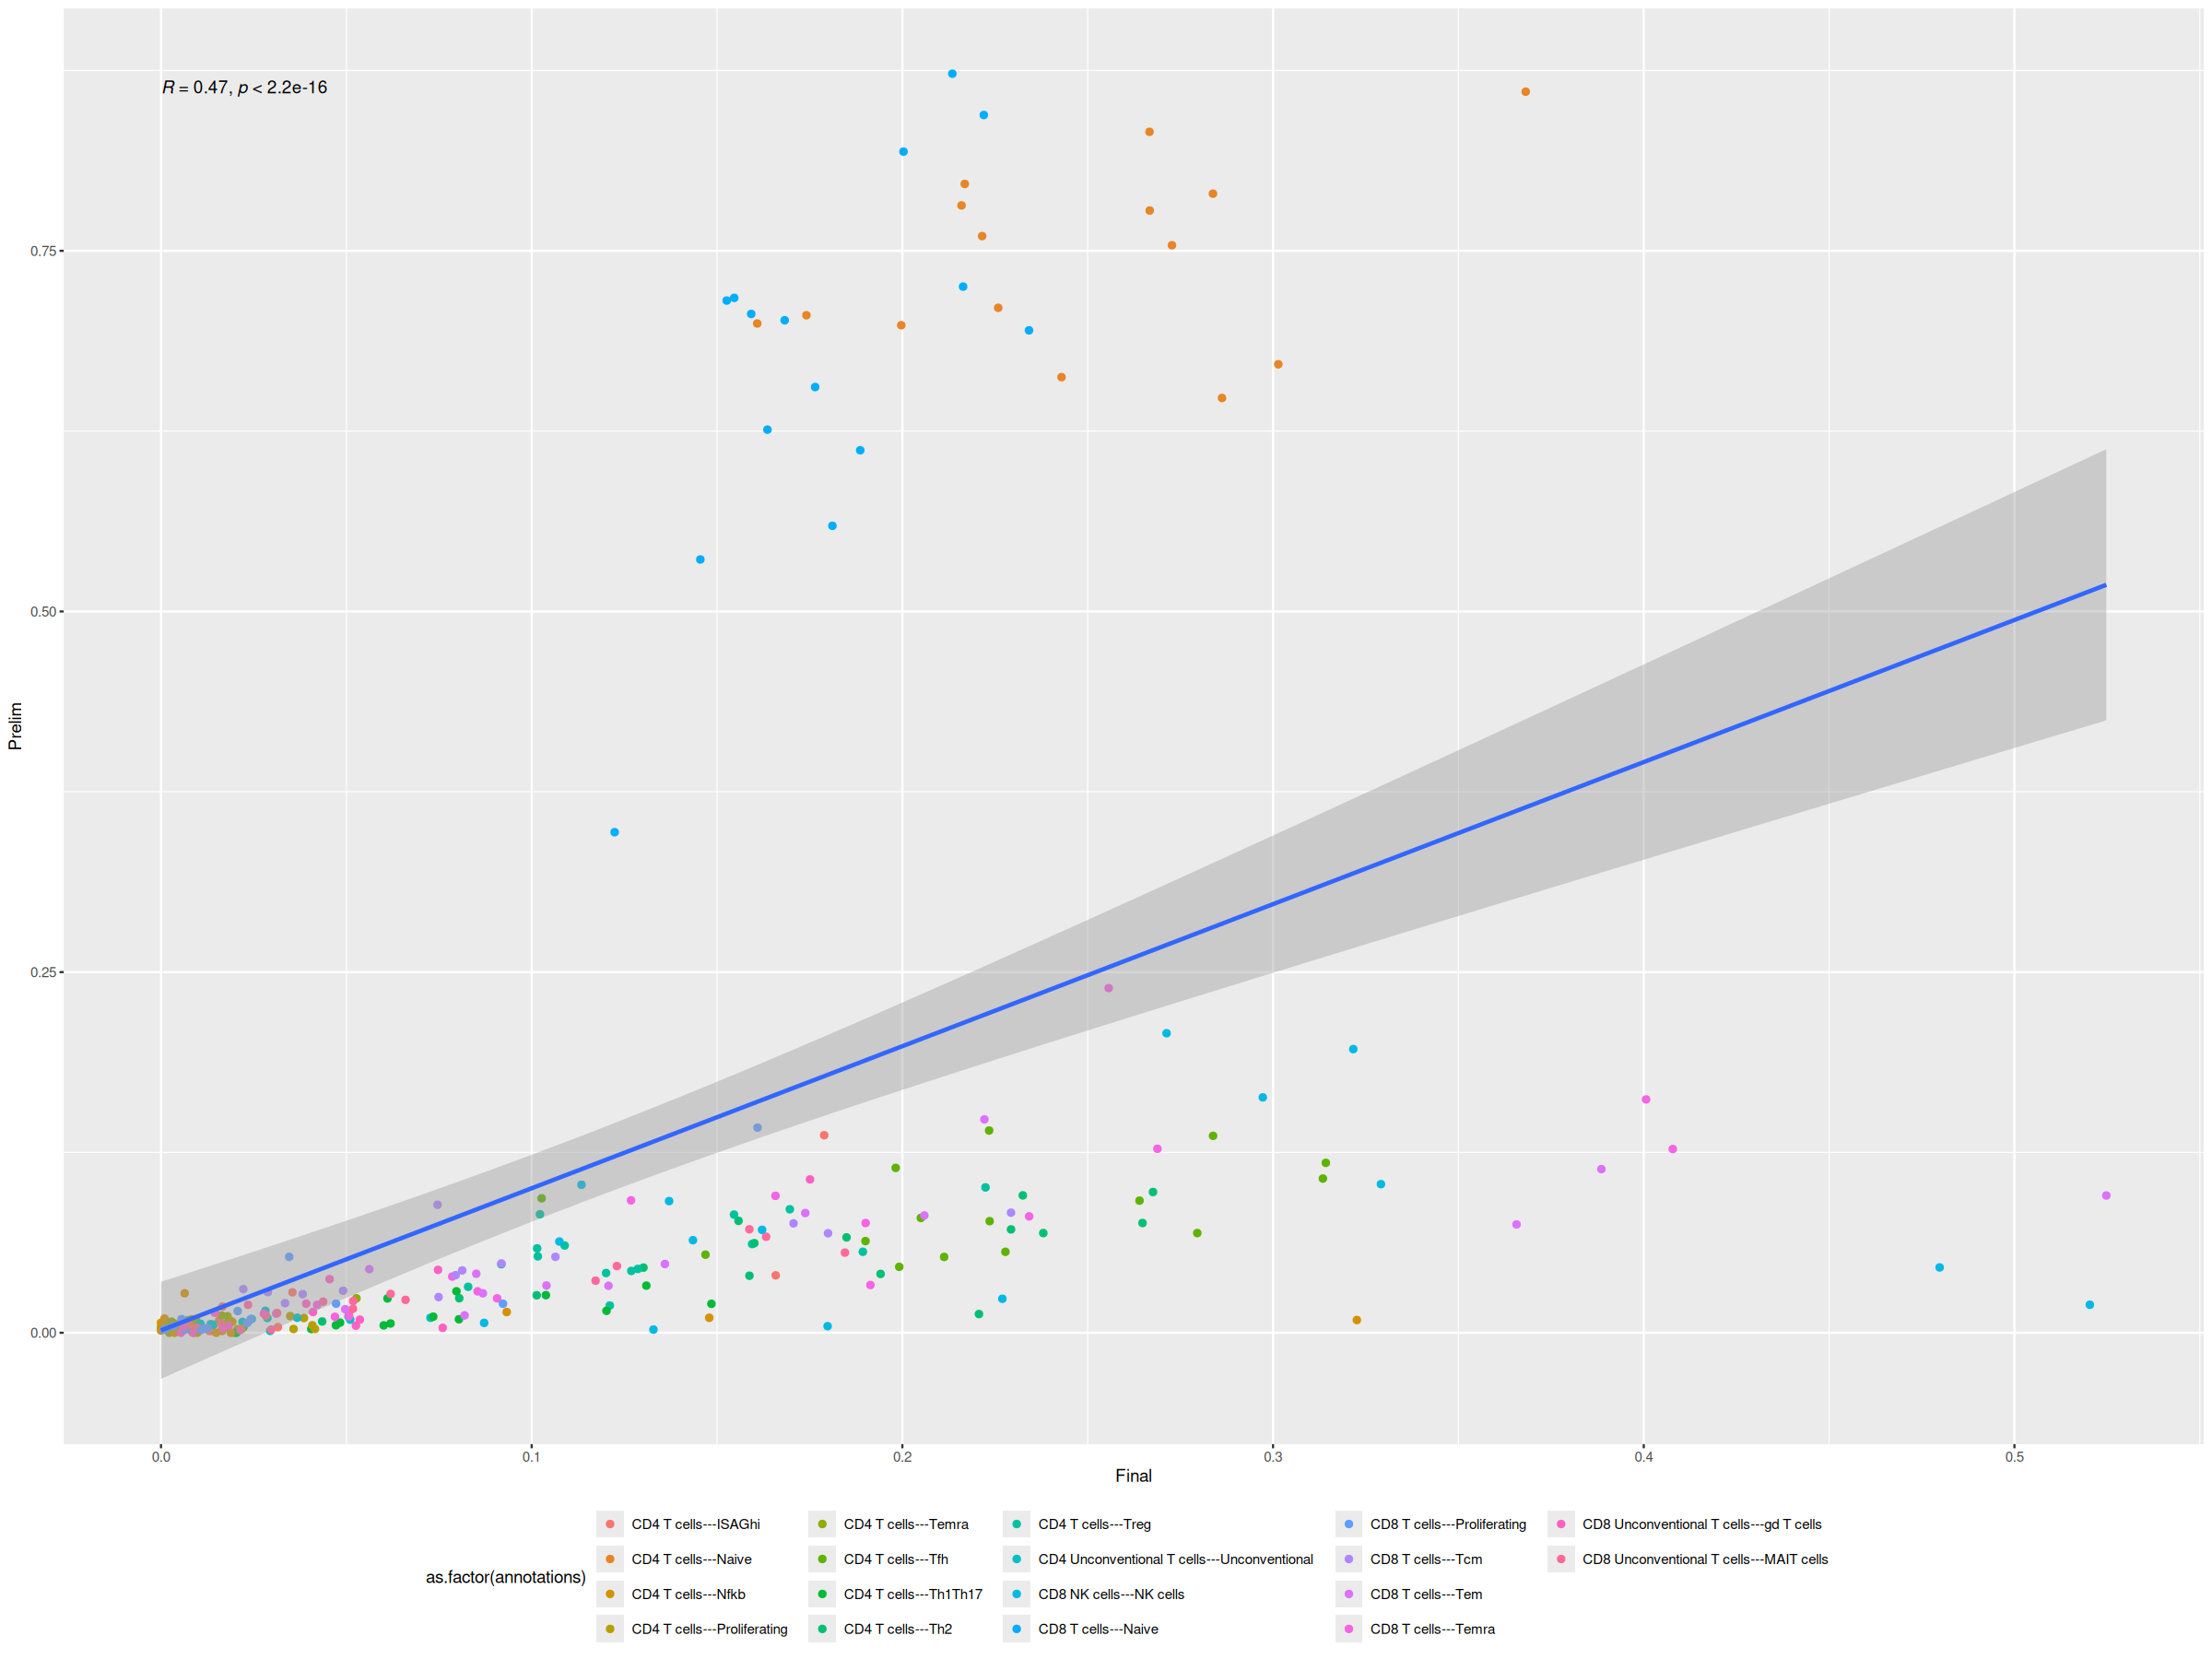

In [89]:
options(repr.plot.width= 20, repr.plot.height = 15)
popul_final_freq_from_total %>% 
dplyr::filter(Level == "L2")  %>% 
ggplot(aes(x=Final, y=Prelim)) +
  geom_point(shape = 16, alpha = 1, size = 2, aes(color = as.factor(annotations))) +
 geom_smooth(method=lm) + theme(legend.position = "bottom") + 
ggpubr::stat_cor()

In [90]:
l2_only  <- popul_final_freq_from_total %>% 
dplyr::filter(Level == "L2")
centroids <- aggregate(cbind(Final,Prelim)~annotations,l2_only,mean)

Scale for shape is already present.
Adding another scale for shape, which will replace the existing scale.
`geom_smooth()` using formula = 'y ~ x'


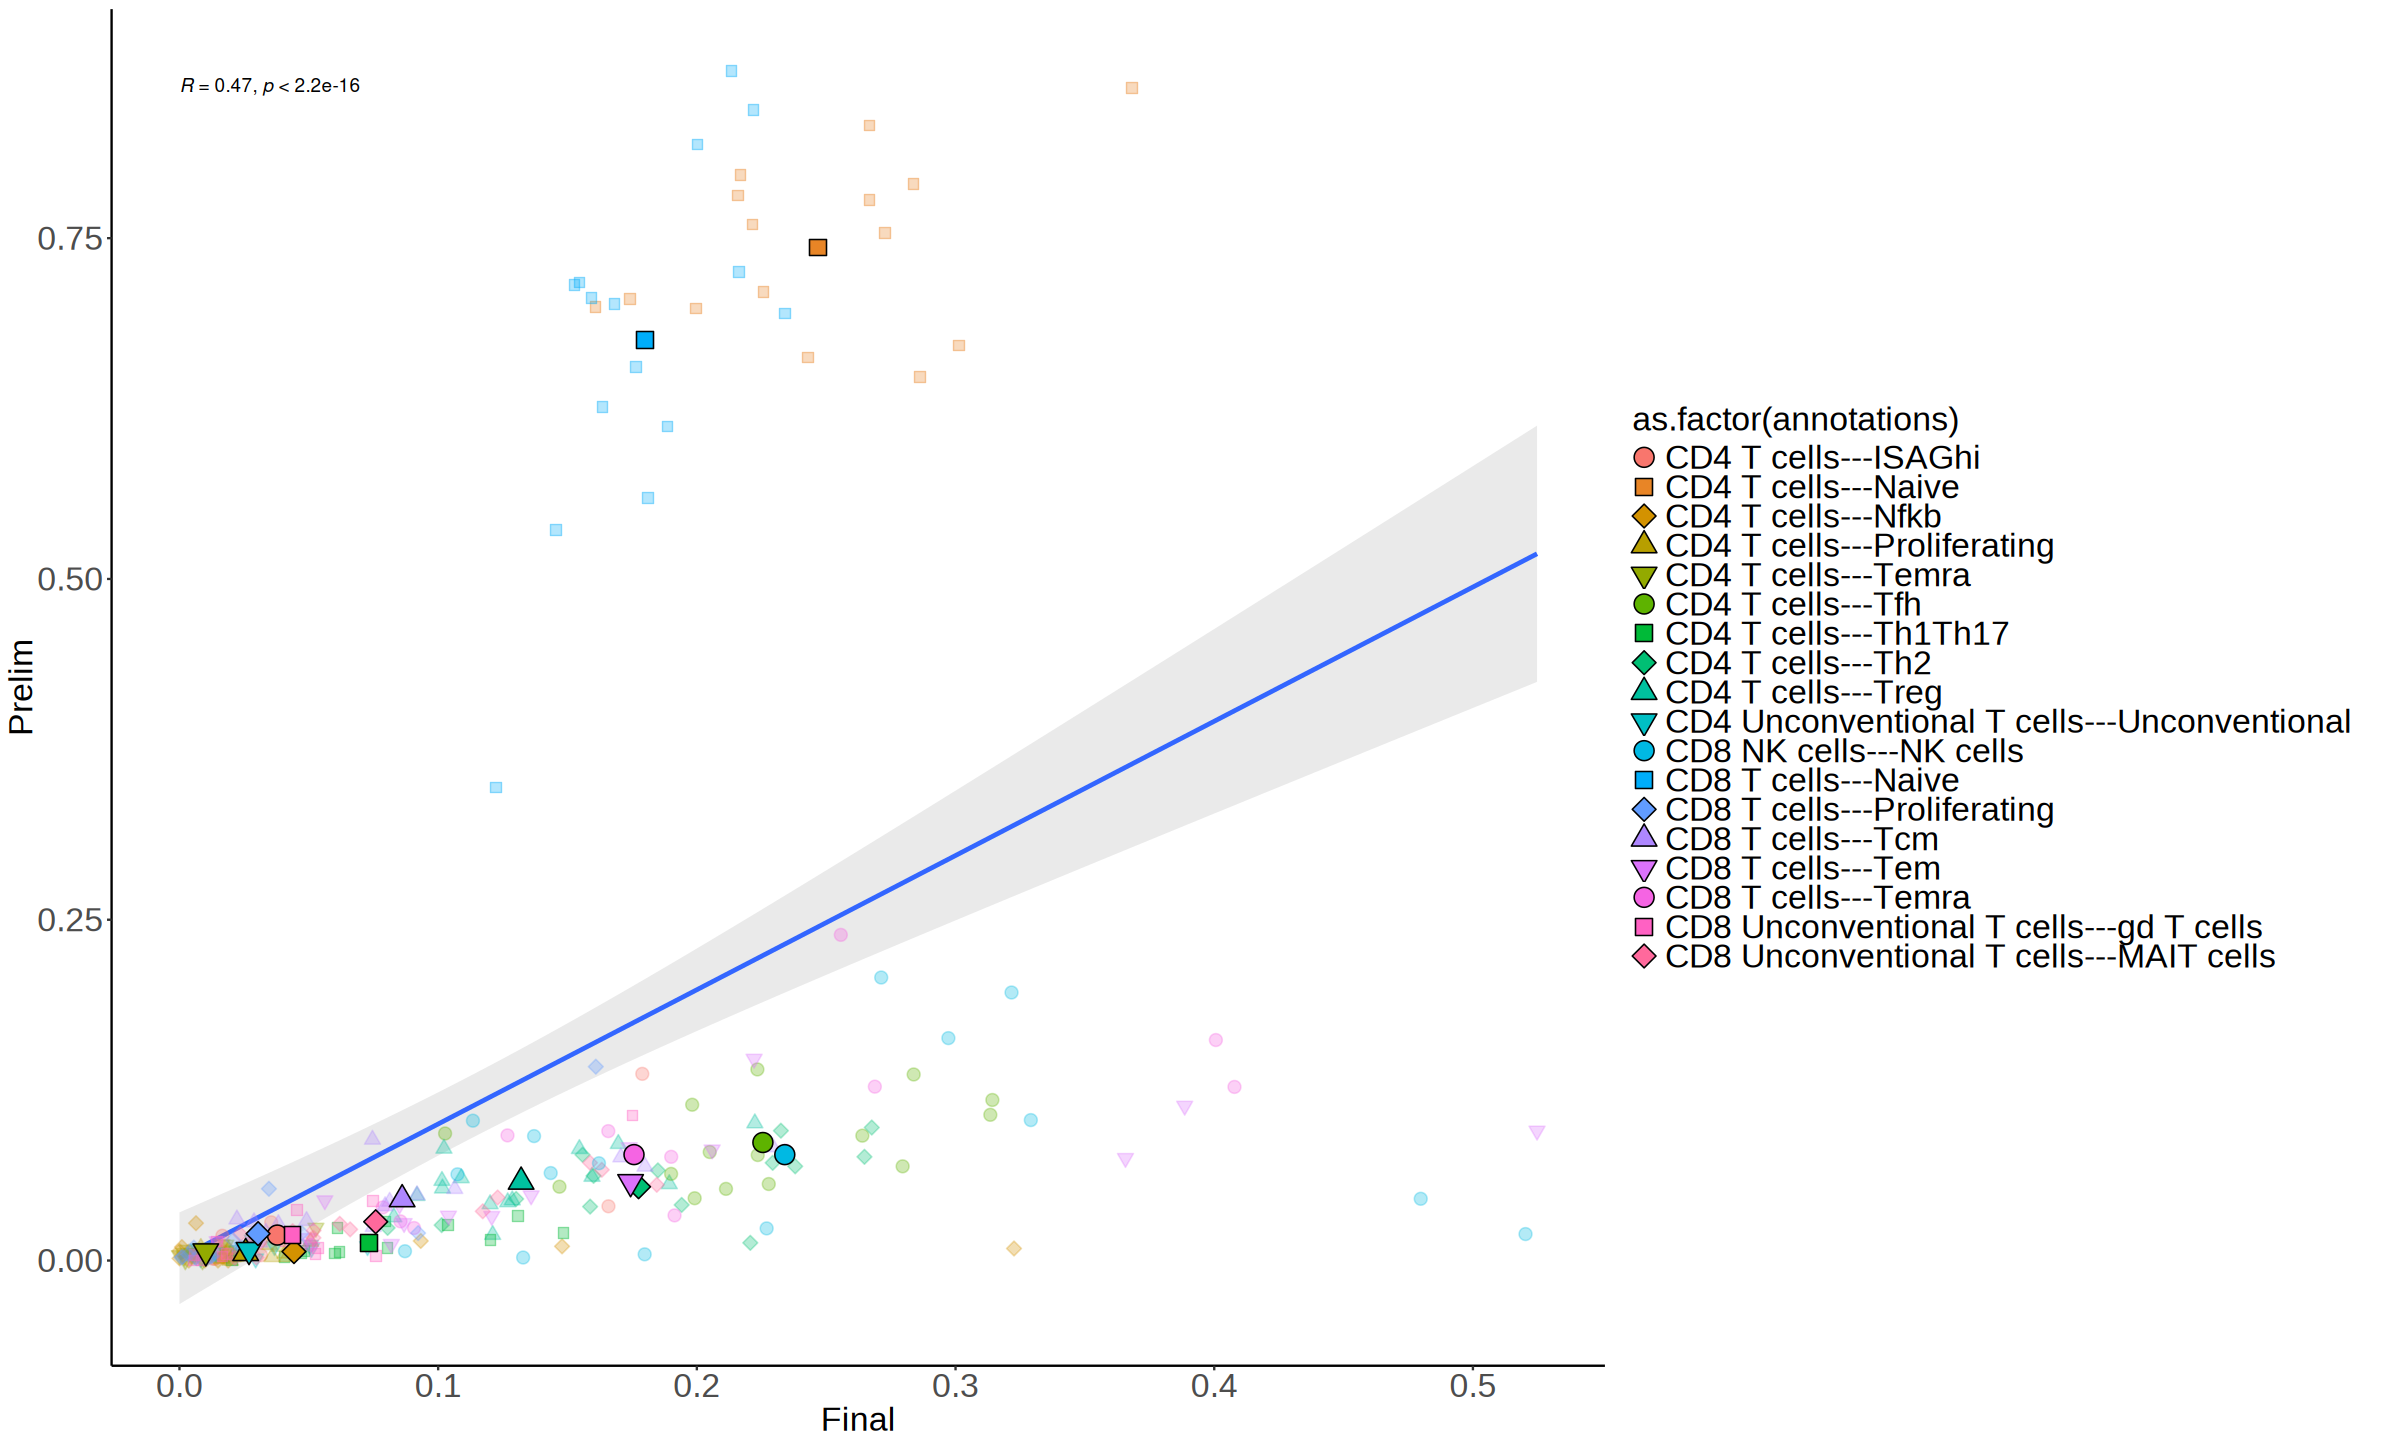

In [101]:
options(repr.plot.width= 20, repr.plot.height = 12)
suppressWarnings({
popul_final_freq_from_total %>% 
dplyr::filter(Level == "L2")  %>% 
ggplot(aes(x=Final, y=Prelim)) +
 geom_smooth(method=lm, alpha = 0.2) + theme(legend.position = "bottom") + 
 geom_point(alpha =0.3, size = 3, aes(color = as.factor(annotations), 
                                       fill = as.factor(annotations),
                                    shape = as.factor(annotations))) +
scale_shape_manual(values = c(21:25,21:25,21:25,21:25)) +
ggpubr::stat_cor() + geom_point(data=centroids,size=5, color = "black",
                                aes(fill = as.factor(annotations),
                                                          shape = as.factor(annotations))) + 
scale_shape_manual(values = c(21:25,21:25,21:25,21:25)) + 
theme(axis.text.x = element_text(angle = 90)) + 
theme_classic() +
ggtheme()
})

In [93]:
dir.create("../figures/QC/")

Scale for shape is already present.
Adding another scale for shape, which will replace the existing scale.
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


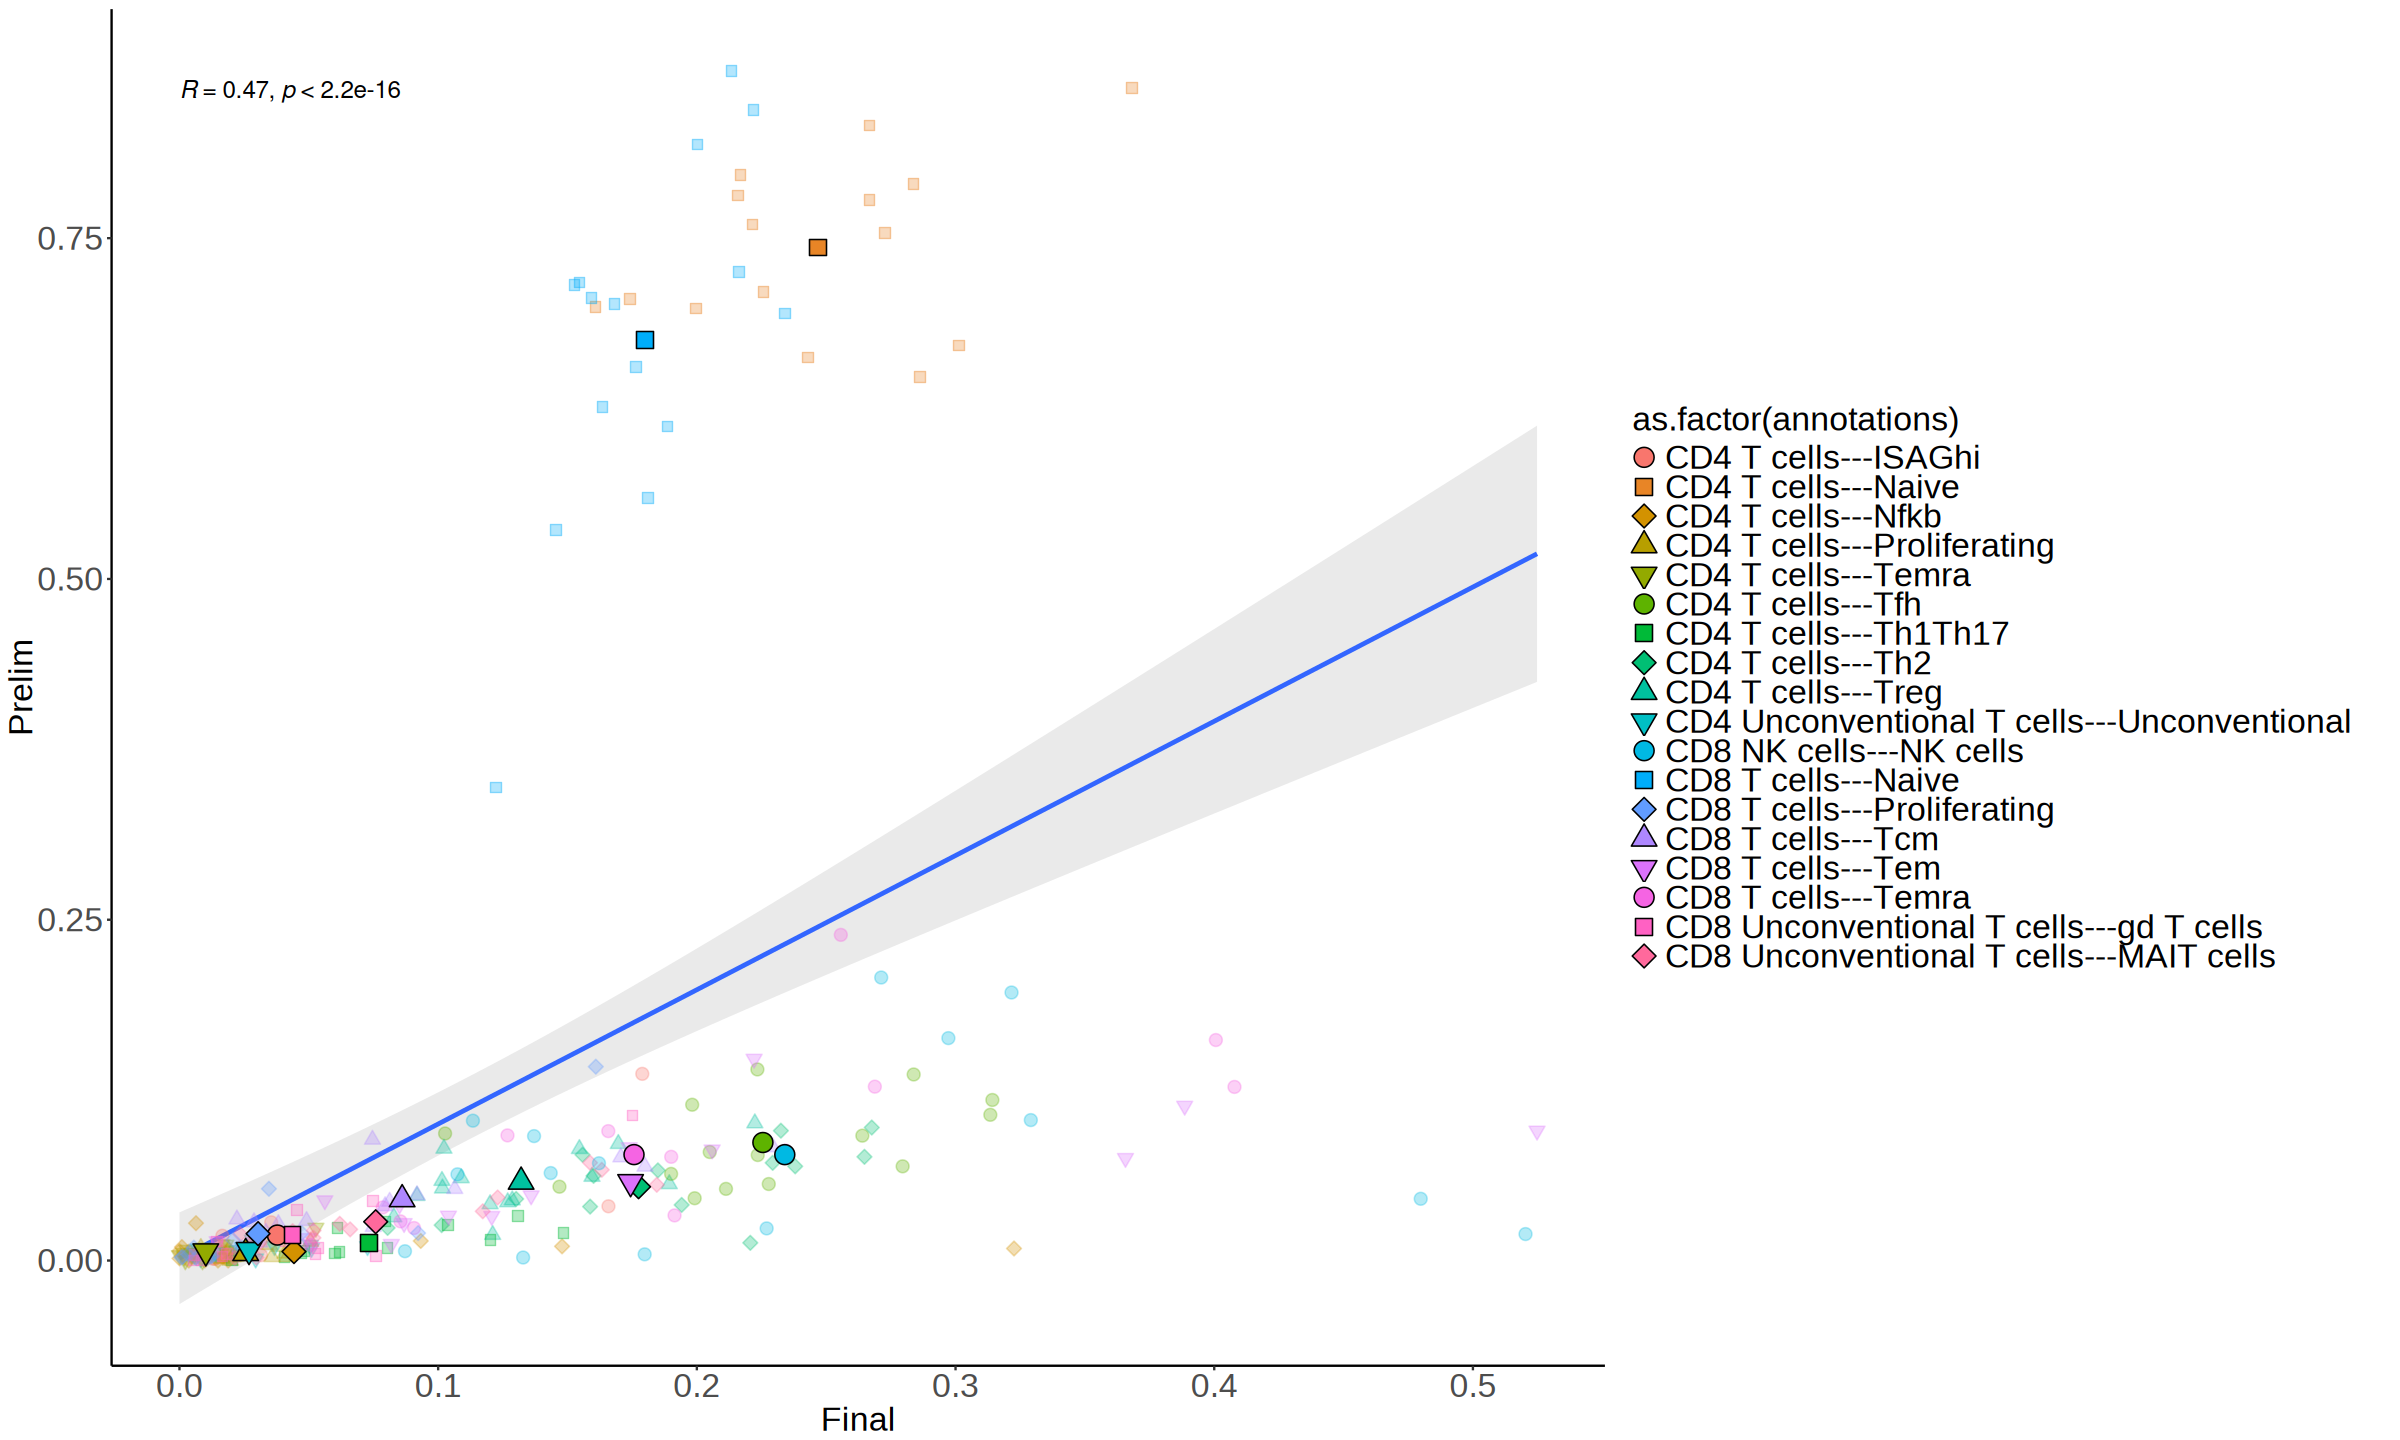

In [98]:
options(repr.plot.width= 20, repr.plot.height = 12)
popul_final_freq_from_total %>% 
dplyr::filter(Level == "L2")  %>% 
ggplot(aes(x=Final, y=Prelim)) +
 geom_smooth(method=lm, alpha = 0.2) + 
theme(legend.position = "bottom") + 
 geom_point(alpha =0.3, size = 3, aes(color = as.factor(annotations), 
                                       fill = as.factor(annotations),
                                    shape = as.factor(annotations))) +
scale_shape_manual(values = c(21:25,21:25,21:25,21:25)) +
ggpubr::stat_cor(size = 5) + geom_point(data=centroids,size=5, color = "black",
                                aes(fill = as.factor(annotations),
                                                          shape = as.factor(annotations))) + 
scale_shape_manual(values = c(21:25,21:25,21:25,21:25)) + 
theme(axis.text.x = element_text(angle = 90)) + 
theme_classic() +
ggtheme()

ggsave("../figures/QC/final_vs_preliminary.svg", width = 44, height = 25, units = "cm")
ggsave("../figures/QC/final_vs_preliminary.png", width = 44, height = 25, units = "cm")

In [96]:
options(warn = -1) 

`geom_smooth()` using formula = 'y ~ x'


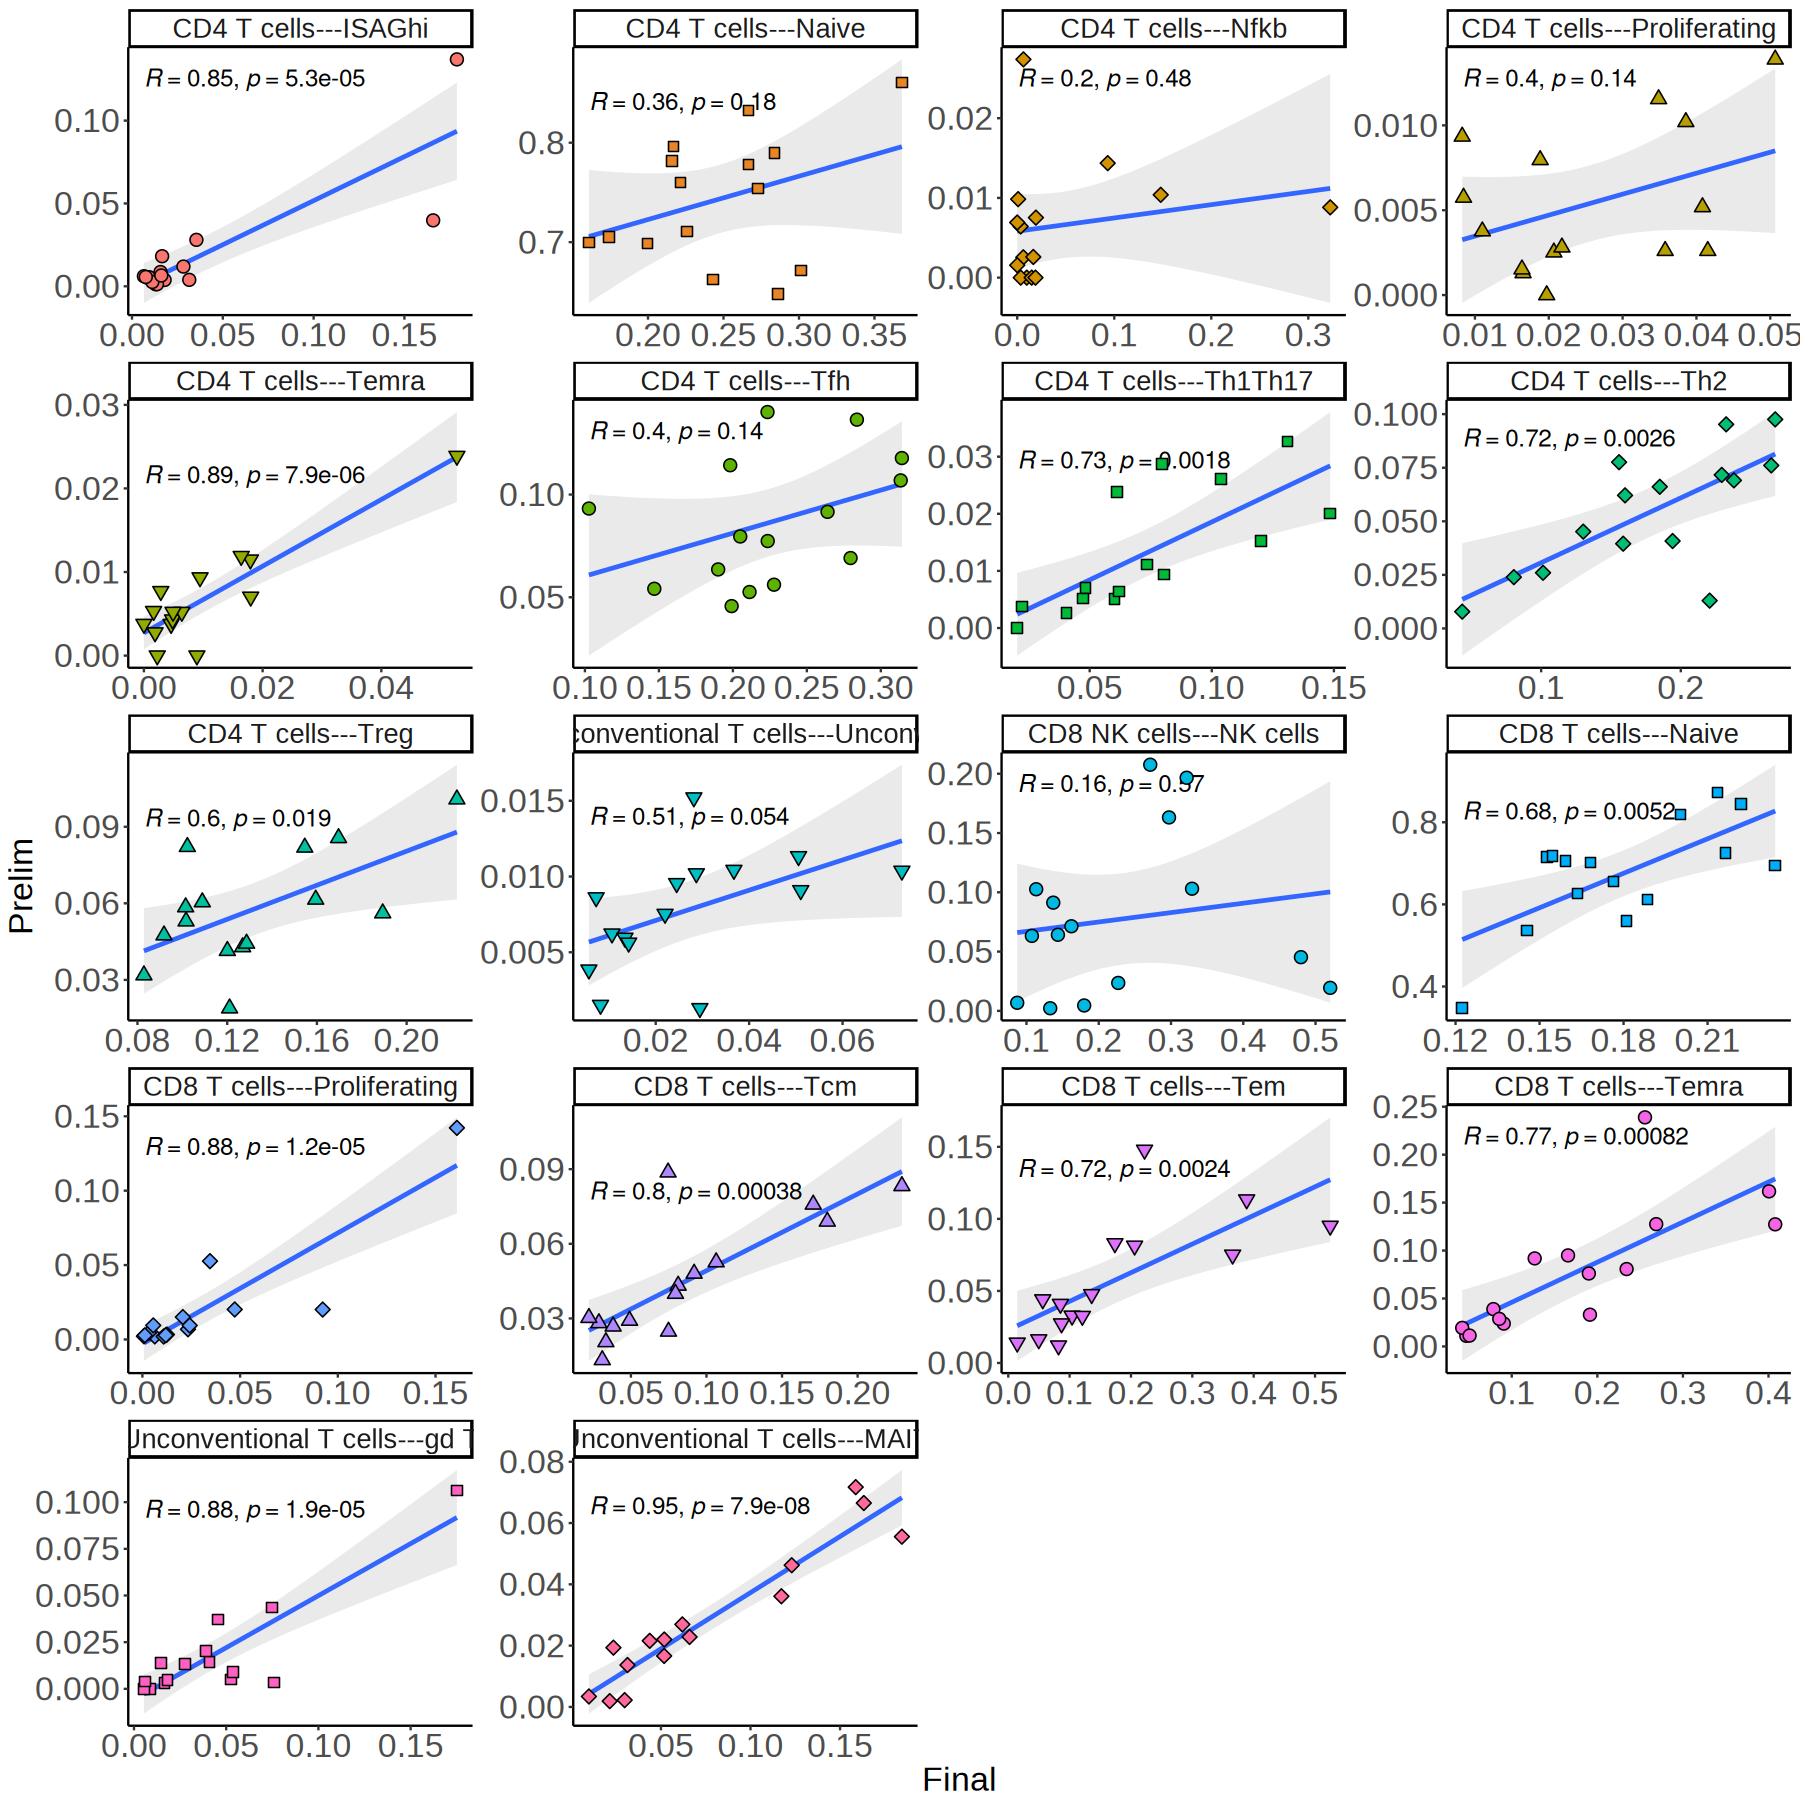

In [97]:
options(repr.plot.width= 15, repr.plot.height = 15)
popul_final_freq_from_total %>% 
dplyr::filter(Level == "L2")  %>% 
ggplot(aes(x=Final, y=Prelim)) +
facet_wrap(~annotations, ncol = 4, scales = "free")+
#  geom_point(shape = 16, alpha = 1, size = 2, aes(color = as.factor(annotations))) +
 geom_smooth(method=lm, alpha = 0.2) + theme(legend.position = "bottom") + 
ggpubr::stat_cor(size = 5) +
theme(axis.text.x = element_text(angle = 90)) + 
geom_point(size=3,                                aes(fill = as.factor(annotations),
                                                          shape = as.factor(annotations))) + 
scale_shape_manual(values = c(21:25,21:25,21:25,21:25)) +
theme_classic() +
ggtheme() + NoLegend()

## Correlation of populations in T0 vs T1

### Freq from total

In [ ]:
IDs_1  <- populations_2  %>% 
dplyr::filter(prelim_final == "Final" & Time == "T0" & Disease == "Dia")  %>% 
pull(Patient_ID)  %>% unique

In [ ]:
IDs_2  <- populations_2  %>% 
dplyr::filter(prelim_final == "Final" & Time == "T1" & Disease == "Dia")  %>% 
pull(Patient_ID)  %>% unique

In [ ]:
IDs  <- intersect(IDs_1, IDs_2)

In [ ]:
IDs

In [ ]:
popul_final_freq_from_total  <- populations_2  %>% 
ungroup  %>% 
mutate(prelim_final = ifelse(Experiment_ID %in% c("Exp08", "Exp10", "Exp11"), "Prelim","Final"))  %>% 
dplyr::filter(Patient_ID %in% IDs & prelim_final == "Final")  %>% 
dplyr::select(Patient_ID, Time, annotations, freq_from_total, Level)  %>% 
pivot_wider(names_from = "Time", values_from = freq_from_total)

In [ ]:
popul_final_freq_from_total  %>% dplyr::filter(!is.na(T1))

In [ ]:
options(repr.plot.width= 20, repr.plot.height = 15)
popul_final_freq_from_total %>% 
dplyr::filter(Level == "L2")  %>% 
ggplot(aes(x=T0, y=T1)) +
  geom_point(shape = 16, alpha = 1, size = 2, aes(color = as.factor(annotations))) +
 geom_smooth(method=lm) + theme(legend.position = "bottom") + 
ggpubr::stat_cor()

In [ ]:
l2_only  <- popul_final_freq_from_total %>% 
dplyr::filter(Level == "L2")
centroids <- aggregate(cbind(T1,T0)~annotations,l2_only,mean)

In [ ]:
options(repr.plot.width= 20, repr.plot.height = 12)
popul_final_freq_from_total %>% 
dplyr::filter(Level == "L2")  %>% 
ggplot(aes(x=T0, y=T1)) +
 geom_smooth(method=lm, alpha = 0.2) + theme(legend.position = "bottom") + 
 geom_point(alpha =0.3, size = 3, aes(color = as.factor(annotations), 
                                       fill = as.factor(annotations),
                                    shape = as.factor(annotations))) +
scale_shape_manual(values = c(21:25,21:25,21:25,21:25)) +
ggpubr::stat_cor(size = 5) + geom_point(data=centroids,size=5, color = "black",
                                aes(fill = as.factor(annotations),
                                                          shape = as.factor(annotations))) + 
scale_shape_manual(values = c(21:25,21:25,21:25,21:25)) + 
theme(axis.text.x = element_text(angle = 90)) + 
theme_classic() +
ggtheme()

ggsave("../figures/QC/t1_vs_t0.svg", width = 44, height = 25, units = "cm")
ggsave("../figures/QC/t1_vs_t0.png", width = 44, height = 25, units = "cm")

In [ ]:
options(repr.plot.width= 15, repr.plot.height = 15)
popul_final_freq_from_total %>% 
dplyr::filter(Level == "L2")  %>% 
ggplot(aes(x=T0, y=T1)) +
facet_wrap(~annotations, ncol = 4, scales = "free")+
#  geom_point(shape = 16, alpha = 1, size = 2, aes(color = as.factor(annotations))) +
 geom_smooth(method=lm, alpha = 0.2) + theme(legend.position = "bottom") + 
ggpubr::stat_cor(size = 5) +
theme(axis.text.x = element_text(angle = 90)) + 
geom_point(size=3,                                aes(fill = as.factor(annotations),
                                                          shape = as.factor(annotations))) + 
scale_shape_manual(values = c(21:25,21:25,21:25,21:25)) +
theme_classic() +
ggtheme() + NoLegend()

In [ ]:
cd8_l1_full_filt$Patient_Time

In [ ]:
cd4_l1_full_filt$Patient_Time

In [121]:
cd4_agg  <- AverageExpression(cd4_l1_full_filt, features = "GZMB", group.by = "Patient_Time", return.seurat = F, assay = "RNA")

gzmb_cd4  <- cd4_agg$RNA  %>% t() %>% as.data.frame()  %>% 
rownames_to_column("Patient_Time")  %>% 
mutate(Patient_Time = gsub(Patient_Time, pattern = "g", replacement = ""))  %>% 
mutate(GZMB_cd4 = V1)

write.csv(gzmb_cd4, "../tables/flow/gzmb_cd4_scRNAseq.csv")

# Correlation with clinical data

## Freq from total

In [ ]:
populations_2  %>% colnames

In [ ]:
populations_2  %>% ncol

In [ ]:
md3  <- populations_2  %>% 
ungroup  %>% 
dplyr::select(-Main)  %>% 
mutate(annotations = paste(Level, annotations))  %>% 
dplyr::select(6,7,10,12,2,22,16)  %>% 
dplyr::filter(prelim_final == "Final")  %>% 
unique  %>% 
pivot_wider(names_from = "annotations", values_from = "freq_from_total")

In [ ]:
md3

In [ ]:
md_cpept_orig  <- read_xlsx("../data/metadata_v06.xlsx") 

In [ ]:
colnames(md_cpept_orig)

In [ ]:
md_cpept  <- read_xlsx("../data/metadata_v06.xlsx")  %>% 
mutate(Patient_Time = paste(patient, time_taken))  %>% 
       dplyr::select(Patient_Time, fasting_cpept_T1, fasting_cpept_1, c_peptide_chang)  %>% unique

In [ ]:
md_cpept   <- md_cpept  %>% mutate(group = substr(Patient_Time,1,1))  %>% filter(group == 1)

In [ ]:
md_cpept

In [ ]:
md3  <- md3  %>% separate(Condition, into = c("Disease", "Time"), remove = F, sep = " ")

In [ ]:
md3$Patient_Time  <- paste(md3$Patient_ID, md3$Time)

In [ ]:
md4  <- md_cpept  %>% left_join(md3)  %>% dplyr::filter(!is.na(fasting_cpept_T1))

In [ ]:
md4 

In [ ]:
population_colnames  <- which(substr(colnames(md4),start = 1,stop = 1) == "L")

In [ ]:
population_colnames  %>% length

In [ ]:
which(colnames(md4) == "fasting_cpept_1")

In [ ]:
md4

In [ ]:
calc_correlation  <- function(i){
    df  <- md4  %>% dplyr::select(i,2)  %>% filter(!is.na(2))
    colnames(df)  <- c("value","fasting_cpept_t1")
    cor  <- cor.test(df$value, df$fasting_cpept_t1)
    res_df1  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*102>1,1,cor$p.value*102),
                         test = "fasting_cpept_T1")
    
    df  <- md4  %>% dplyr::select(i,3)  %>% filter(!is.na(3))
    colnames(df)  <- c("value","fasting_cpept_1")
    cor  <- cor.test(df$value, df$fasting_cpept_1)
    res_df2  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*102>1,1,cor$p.value*102),
                         test = "fasting_cpept")
    
    df  <- md4  %>% dplyr::select(i,4)  %>% filter(!is.na(4))
    colnames(df)  <- c("value","c_peptide_change")
    cor  <- cor.test(df$value, df$c_peptide_change)
    res_df3  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*102>1,1,cor$p.value*102),
                         test = "c_peptide_change")
    
    res_df  <- rbind(res_df1, res_df2, res_df3)
    return(res_df)
}

In [ ]:
populations_corr  <- future_map(population_colnames, calc_correlation)

In [ ]:
populations_corr  <- bind_rows(populations_corr)

In [ ]:
populations_corr  %>% arrange(pval)

## L2 CD4

In [ ]:
population_colnames_l2  <- which(substr(colnames(md4),start = 1,stop = 2) == "L2" &
                                 grepl(colnames(md4), pattern = "CD4"))

In [ ]:
population_colnames_l2

In [ ]:
md4

In [ ]:
calc_correlation  <- function(i){
    df  <- md4  %>% dplyr::select(i,2)  %>% filter(!is.na(2))
   colnames(df)  <- c("value","fasting_cpept_t1")
    cor  <- cor.test(df$value, df$fasting_cpept_t1)
    res_df1  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*10>1,1,cor$p.value*10),
                         test = "fasting_cpept_T1")
    
    df  <- md4  %>% dplyr::select(i,3)  %>% filter(!is.na(3))
    colnames(df)  <- c("value","fasting_cpept_1")
    cor  <- cor.test(df$value, df$fasting_cpept_1)
    res_df2  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*10>1,1,cor$p.value*10),
                         test = "fasting_cpept")
    
    df  <- md4  %>% dplyr::select(i,4)  %>% filter(!is.na(4))
    colnames(df)  <- c("value","c_peptide_change")
    cor  <- cor.test(df$value, df$c_peptide_change)
    res_df3  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*10>1,1,cor$p.value*10),
                         test = "c_peptide_change")
    
    res_df  <- rbind(res_df1, res_df2, res_df3)
    return(res_df)
}

In [ ]:
populations_corr_cd4  <- future_map(population_colnames_l2, calc_correlation)

In [ ]:
populations_corr  <- bind_rows(populations_corr_cd4)

populations_corr  %>% arrange(pval)

In [ ]:
populations_corr  <- populations_corr  %>% mutate(population = gsub(population, pattern = "L2 CD4 T cells---", replacement = ""))  %>% 
    mutate(population = gsub(population, pattern = "L2 CD4 Unconventional T cells---", replacement = ""))

In [ ]:
options(repr.plot.width = 36, repr.plot.height = 7)
populations_corr  %>% 
dplyr::filter(test == "c_peptide_change")  %>% 
arrange(cor)  %>% 
ggplot(aes(x = test, y = reorder(population, cor))) +
geom_point(aes(size = -log(pval), color = cor)) + 
facet_wrap(~test) +
ylab("") + xlab("") +
scale_color_gradient2(low = "blue", mid = "white", high = "red") + 
theme_classic() + ggtheme() + theme(axis.text.x = element_text(angle = 90)) +

populations_corr  %>% 
dplyr::filter(test == "fasting_cpept_T1")  %>% 
arrange(cor)  %>% 
ggplot(aes(x = test, y = reorder(population, cor))) +
geom_point(aes(size = -log(pval), color = cor)) + 
facet_wrap(~test) +
ylab("") + xlab("") +
scale_color_gradient2(low = "blue", mid = "white", high = "red") + 
theme_classic() + ggtheme() + theme(axis.text.x = element_text(angle = 90)) +

populations_corr  %>% 
dplyr::filter(test == "fasting_cpept")  %>% 
arrange(cor)  %>% 
ggplot(aes(x = test, y = reorder(population, cor))) +
geom_point(aes(size = -log(pval), color = cor)) + 
facet_wrap(~test) +
ylab("") + xlab("") +
scale_color_gradient2(low = "blue", mid = "white", high = "red") + 
theme_classic() + ggtheme() + theme(axis.text.x = element_text(angle = 90)) 

In [ ]:
ggsave("../figures/populations_correlations/population_correlations_L2_cd4.png", width = 72, height = 15, units = "cm", create.dir = TRUE)
ggsave("../figures/populations_correlations/population_correlations_L2_cd4.svg", width = 72, height = 15, units = "cm")

## L2 CD8

In [ ]:
population_colnames_l2  <- which(substr(colnames(md4),start = 1,stop = 2) == "L2" &
                                 grepl(colnames(md4), pattern = "CD8"))

In [ ]:
population_colnames_l2

In [ ]:
md4

In [ ]:
calc_correlation  <- function(i){
    df  <- md4  %>% dplyr::select(i,2)  %>% filter(!is.na(2))
   colnames(df)  <- c("value","fasting_cpept_t1")
    cor  <- cor.test(df$value, df$fasting_cpept_t1)
    res_df1  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*10>1,1,cor$p.value*10),
                         test = "fasting_cpept_T1")
    
    df  <- md4  %>% dplyr::select(i,3)  %>% filter(!is.na(3))
    colnames(df)  <- c("value","fasting_cpept_1")
    cor  <- cor.test(df$value, df$fasting_cpept_1)
    res_df2  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*10>1,1,cor$p.value*10),
                         test = "fasting_cpept")
    
    df  <- md4  %>% dplyr::select(i,4)  %>% filter(!is.na(4))
    colnames(df)  <- c("value","c_peptide_change")
    cor  <- cor.test(df$value, df$c_peptide_change)
    res_df3  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*10>1,1,cor$p.value*10),
                         test = "c_peptide_change")
    
    res_df  <- rbind(res_df1, res_df2, res_df3)
    return(res_df)
}

In [ ]:
populations_corr_cd8  <- future_map(population_colnames_l2, calc_correlation)

In [ ]:
populations_corr  <- bind_rows(populations_corr_cd8)

populations_corr  %>% arrange(pval)

In [ ]:
populations_corr  <- populations_corr  %>% mutate(population = gsub(population, pattern = "L2 CD8 T cells---", replacement = ""))  %>% 
    mutate(population = gsub(population, pattern = "L2 CD8 Unconventional T cells---", replacement = ""))

In [ ]:
options(repr.plot.width = 36, repr.plot.height = 7)
populations_corr  %>% 
dplyr::filter(test == "c_peptide_change")  %>% 
arrange(cor)  %>% 
ggplot(aes(x = test, y = reorder(population, cor))) +
geom_point(aes(size = -log(pval), color = cor)) + 
facet_wrap(~test) +
ylab("") + xlab("") +
scale_color_gradient2(low = "blue", mid = "white", high = "red") + 
theme_classic() + ggtheme() + theme(axis.text.x = element_text(angle = 90)) +

populations_corr  %>% 
dplyr::filter(test == "fasting_cpept_T1")  %>% 
arrange(cor)  %>% 
ggplot(aes(x = test, y = reorder(population, cor))) +
geom_point(aes(size = -log(pval), color = cor)) + 
facet_wrap(~test) +
ylab("") + xlab("") +
scale_color_gradient2(low = "blue", mid = "white", high = "red") + 
theme_classic() + ggtheme() + theme(axis.text.x = element_text(angle = 90)) +

populations_corr  %>% 
dplyr::filter(test == "fasting_cpept")  %>% 
arrange(cor)  %>% 
ggplot(aes(x = test, y = reorder(population, cor))) +
geom_point(aes(size = -log(pval), color = cor)) + 
facet_wrap(~test) +
ylab("") + xlab("") +
scale_color_gradient2(low = "blue", mid = "white", high = "red") + 
theme_classic() + ggtheme() + theme(axis.text.x = element_text(angle = 90)) 

In [ ]:
ggsave("../figures/populations_correlations/population_correlations_L2_cd8.png", width = 72, height = 15, units = "cm", create.dir = TRUE)
ggsave("../figures/populations_correlations/population_correlations_L2_cd8.svg", width = 72, height = 15, units = "cm")

# Treg vs cpept

In [ ]:
population_colnames_l3  <- which(substr(colnames(md4),start = 1,stop = 2) == "L3")

In [ ]:
population_colnames_l3

In [ ]:
calc_correlation  <- function(i){
    df  <- md4  %>% dplyr::select(i,2)  %>% filter(!is.na(2))
   colnames(df)  <- c("value","fasting_cpept_t1")
    cor  <- cor.test(df$value, df$fasting_cpept_t1)
    res_df1  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*10>1,1,cor$p.value*10),
                         test = "fasting_cpept_T1")
    
    df  <- md4  %>% dplyr::select(i,3)  %>% filter(!is.na(3))
    colnames(df)  <- c("value","fasting_cpept_1")
    cor  <- cor.test(df$value, df$fasting_cpept_1)
    res_df2  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*10>1,1,cor$p.value*10),
                         test = "fasting_cpept")
    
    df  <- md4  %>% dplyr::select(i,4)  %>% filter(!is.na(4))
    colnames(df)  <- c("value","c_peptide_change")
    cor  <- cor.test(df$value, df$c_peptide_change)
    res_df3  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*10>1,1,cor$p.value*10),
                         test = "c_peptide_change")
    
    res_df  <- rbind(res_df1, res_df2, res_df3)
    return(res_df)
}

In [ ]:
populations_corr_l3  <- future_map(population_colnames_l3, calc_correlation)

In [ ]:
populations_corr  <- bind_rows(populations_corr_l3)

In [ ]:
populations_corr  %>% filter(grepl(populations_corr$population, pattern = "Treg"))

In [ ]:
md4

In [ ]:
ls()

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 5)
j = 1
for(i in (populations_corr  %>% filter(grepl(population, pattern = "Treg"))  %>% 
           pull(population))[1:12]  %>% unique){
    df2 <- md4  %>% dplyr::select(which(colnames(md4)==i), 
                                  fasting_cpept_T1 = 2, 
                                  fasting_cpept_1 = 3,
                                  c_peptide_change = 4) 
    colnames(df2)[1]  <- c("value")
  p1 <-  df2 %>%  ggplot(aes(x=value, y=fasting_cpept_T1)) +
  geom_point(shape = 16, size = 2) +
  geom_smooth(method=lm, alpha = 0.2) + ggtitle(gsub(i, pattern = "L3 CD4 T cells---Treg---", replacement = " ")) + 
stat_cor(size = 7) + theme_classic() + ggtheme() 

    p2 <-  df2 %>%  ggplot(aes(x=value, y=fasting_cpept_1)) +
  geom_point(shape = 16, size = 2) +
  geom_smooth(method=lm, alpha = 0.2) + ggtitle(" ") + 
stat_cor(size = 7) + theme_classic() + ggtheme() 

    p3 <-  df2 %>%  ggplot(aes(x=value, y=c_peptide_change)) +
  geom_point(shape = 16, size = 2) +
  geom_smooth(method=lm, alpha = 0.2) + ggtitle(" ") + 
stat_cor(size = 7) + theme_classic() + ggtheme() 

    print(p1 + p2 + p3)
    j = j+1
library(svglite)
dir.create("../figures/correlation_populations/")
ggsave(filename = paste0("../figures/correlation_populations/",i,".svg"), width = 12, height = 4)
    }

### Both patient samples t1 and T0

In [ ]:
md5  <- md_cpept  %>% left_join(md3)  %>% dplyr::filter(!is.na(fasting_cpept_1))

In [ ]:
population_colnames_l3  <- which(substr(colnames(md5),start = 1,stop = 2) == "L3")

In [ ]:
population_colnames_l3

In [ ]:
calc_correlation  <- function(i){
    df  <- md5  %>% dplyr::select(i,2)  %>% filter(!is.na(2))
   colnames(df)  <- c("value","fasting_cpept_t1")
    cor  <- cor.test(df$value, df$fasting_cpept_t1)
    res_df1  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*10>1,1,cor$p.value*10),
                         test = "fasting_cpept_T1")
    
    df  <- md5  %>% dplyr::select(i,3)  %>% filter(!is.na(3))
    colnames(df)  <- c("value","fasting_cpept_1")
    cor  <- cor.test(df$value, df$fasting_cpept_1)
    res_df2  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*10>1,1,cor$p.value*10),
                         test = "fasting_cpept")
    
    df  <- md5  %>% dplyr::select(i,4)  %>% filter(!is.na(4))
    colnames(df)  <- c("value","c_peptide_change")
    cor  <- cor.test(df$value, df$c_peptide_change)
    res_df3  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*10>1,1,cor$p.value*10),
                         test = "c_peptide_change")
    
    res_df  <- rbind(res_df1, res_df2, res_df3)
    return(res_df)
}

In [ ]:
populations_corr_l3  <- future_map(population_colnames_l3, calc_correlation)

In [ ]:
populations_corr  <- bind_rows(populations_corr_l3)

In [ ]:
populations_corr  %>% filter(grepl(populations_corr$population, pattern = "Treg"))

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 5)
j = 1
for(i in (populations_corr  %>% filter(grepl(population, pattern = "Treg"))  %>% 
          arrange(pval)  %>% pull(population))[1:12]){
    df2 <- md5  %>% dplyr::select(which(colnames(md5)==i), 
                                  fasting_cpept_T1 = 2, 
                                  fasting_cpept_1 = 3,
                                  c_peptide_change = 4) 
    colnames(df2)[1]  <- c("value")
  p1 <-  df2 %>%  ggplot(aes(x=value, y=fasting_cpept_T1)) +
  geom_point(shape = 16, size = 2) +
  geom_smooth(method=lm, alpha = 0.2) + ggtitle(gsub(i, pattern = "L3 CD4 T cells---Treg---", replacement = " ")) + 
stat_cor(size = 7) + theme_classic() + ggtheme() 

    p2 <-  df2 %>%  ggplot(aes(x=value, y=fasting_cpept_1)) +
  geom_point(shape = 16, size = 2) +
  geom_smooth(method=lm, alpha = 0.2) + ggtitle(" ") + 
stat_cor(size = 7) + theme_classic() + ggtheme() 

    p3 <-  df2 %>%  ggplot(aes(x=value, y=c_peptide_change)) +
  geom_point(shape = 16, size = 2) +
  geom_smooth(method=lm, alpha = 0.2) + ggtitle(" ") + 
stat_cor(size = 7) + theme_classic() + ggtheme() 

    print(p1 + p2 + p3)
    j = j+1
#library(svglite)
#dir.create("../figures/correlation_populations/")
#ggsave(filename = paste0("../figures/correlation_populations/",i,".svg"), width = 5, height = 4.5)
    }

### Age

In [ ]:
md3

In [ ]:
population_colnames  <- which(substr(colnames(md4),start = 1,stop = 1) == "L")

In [ ]:
population_colnames  %>% length

In [ ]:
which(colnames(md4) == "Age")

In [ ]:
calc_correlation  <- function(i){
    df  <- md4  %>% dplyr::select(i,5)  %>% filter(!is.na(5))
    colnames(df)  <- c("value","fasting_cpept_1")
    cor  <- cor.test(df$value, df$fasting_cpept_1)
    res_df  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*102>1,1,cor$p.value*102))
    return(res_df)
}

In [ ]:
populations_corr  <- future_map(population_colnames, calc_correlation)

In [ ]:
populations_corr_age  <- bind_rows(populations_corr)

In [ ]:
populations_corr_age  %>% arrange(pval)

In [ ]:
options(repr.plot.width = 4, repr.plot.height = 4)
j = 1
for(i in (populations_corr_age  %>% arrange(pval)  %>% pull(population))[1:10]){
    df2 <- md4  %>% dplyr::select(which(colnames(md4)==i), Age = 5) 
    colnames(df2)  <- c("value", "Age")
  p <-  df2 %>%  ggplot(aes(x=value, y=Age)) +
  geom_point(shape = 16, size = 2) +
  geom_smooth(method=lm, alpha = 0.2) + ggtitle(gsub(str_to_upper(i), pattern = "_", replacement = " ")) + 
stat_cor(size = 7) + theme_classic() + ggtheme() 
 p <-   print(p)
    j = j+1
#library(svglite)
#dir.create("../figures/correlation_populations/")
#ggsave(filename = paste0("../figures/correlation_populations/",i,".svg"), width = 5, height = 4.5)
    }

## All correlations plot

In [ ]:
populations_corr_age$test  <- "Age" 
populations_corr_cpept_change$test  <- "cpept_change"
populations_corr_fasting_cpept$test  <- "fasting_cpept"
populations_corr_idaa1c$test  <- "idaa1c"
populations_corr_pH$test  <- "pH"


In [ ]:
all_correlations  <- rbind(populations_corr_age, populations_corr_cpept_change,
                       populations_corr_fasting_cpept, populations_corr_idaa1c,
                      populations_corr_pH)

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 30)

all_correlations  %>% ggplot(aes(x = test, y = population)) +
geom_point(aes(size = -log(pval), color = cor)) + 
scale_color_gradient2(low = "blue", mid = "white", high = "red") + 
theme_classic() + ggtheme() + theme(axis.text.x = element_text(angle = 90))

In [ ]:
matrix  <- all_correlations  %>% dplyr::select(cor, population, test)  %>% 
pivot_wider(names_from = "population", values_from = "cor")  %>% 
column_to_rownames("test")  %>% as.matrix  %>% t()

In [ ]:
library(corrplot)

In [ ]:
hm  <- pheatmap(matrix, filename = "../figures/population_correlations_clust.pdf", width = 7, height = 30, units = "cm")

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 30)
all_correlations  %>% ggplot(aes(x = test, 
                                y = factor(population, 
                                           levels = rownames(matrix[hm$tree_row[["order"]],])))) +
geom_point(aes(size = -log(pval), color = cor)) + 
scale_size(range = c(4,10))+
scale_color_gradient2(low = "blue", mid = "white", high = "red") + theme_classic() + ggtheme() + theme(axis.text.x = element_text(angle = 90))

ggsave("../figures/populations_correlations/population_correlations_L3.png", width = 40, height = 75, units = "cm")
ggsave("../figures/populations_correlations/population_correlations_L3.svg", width = 40, height = 75, units = "cm")

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)

all_correlations  %>% 
dplyr::filter(grepl(population, pattern = "L2 C"))  %>% 
ggplot(aes(x = test, y = factor(population, 
                                           levels = rownames(matrix[hm$tree_row[["order"]],])))) +
geom_point(aes(size = -log(pval), color = cor)) + 
scale_size(range = c(4,10))+
scale_color_gradient2(low = "blue", mid = "white", high = "red") + 
theme_classic() + ggtheme() + theme(axis.text.x = element_text(angle = 90)) + 
xlab("") + ylab("")

ggsave("../figures/populations_correlations/population_correlations_L2.png", width = 24, height = 20, units = "cm")
ggsave("../figures/populations_correlations/population_correlations_L2.svg", width = 24, height = 20, units = "cm")

In [ ]:
dir.create("../tables/population_correlations/")
write.csv(populations_corr_age, "../tables/population_correlations/populations_corr_age.csv")
write.csv(populations_corr_cpept_change,"../tables/population_correlations/populations_corr_cpept_change.csv")
write.csv(populations_corr_fasting_cpept, "../tables/population_correlations/populations_corr_fasting_cpept.csv")
write.csv(populations_corr_idaa1c,"../tables/population_correlations/populations_corr_idaa1c.csv")
write.csv(populations_corr_pH, "../tables/population_correlations/populations_corr_pH.csv")

In [ ]:
IDs

## Freq from parent

### Correlation of populations with c_peptide change

#### C_peptide change perc

In [ ]:
populations_2  %>% colnames

In [ ]:
populations_2  %>% ncol

In [ ]:
md3  <- populations_2  %>% 
ungroup  %>% 
dplyr::select(-Main)  %>% 
mutate(annotations = paste(Level, annotations))  %>% 
dplyr::select(6,7,10,12,2,22,19)  %>% 
dplyr::filter(prelim_final == "Final")  %>% 
unique  %>% 
pivot_wider(names_from = "annotations", values_from = "freq_from_parent")

In [ ]:
md3

In [ ]:
md_cpept  <- read_xlsx("../data/metadata_v05.xlsx") 

In [ ]:
md_cpept  <- read_xlsx("../data/metadata_v05.xlsx")  %>% 
mutate(Patient_Time = paste(patient, time_taken))  %>% 
       dplyr::select(Patient_Time, c_peptide_change_perc)  %>% unique

In [ ]:
md_cpept

In [ ]:
md3  <- md3  %>% separate(Condition, into = c("Disease", "Time"), remove = F, sep = " ")

In [ ]:
md3$Patient_Time  <- paste(md3$Patient_ID, md3$Time)

In [ ]:
md4  <- md3  %>% left_join(md_cpept)  %>% dplyr::filter(!is.na(c_peptide_change_perc))

In [ ]:
md4 

In [ ]:
population_colnames  <- which(substr(colnames(md3),start = 1,stop = 1) == "L")

In [ ]:
population_colnames  %>% length

In [ ]:
which(colnames(md4) == "c_peptide_change_perc")

In [ ]:
calc_correlation  <- function(i){
    df  <- md4  %>% dplyr::select(i,111)  %>% filter(!is.na(111))
    colnames(df)  <- c("value","fasting_cpept_1")
    cor  <- cor.test(df$value, df$fasting_cpept_1)
    res_df  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*102>1,1,cor$p.value*102))
    return(res_df)
}

In [ ]:
populations_corr  <- future_map(population_colnames[c(3:47,50,54:length(population_colnames))], calc_correlation)

In [ ]:
populations_corr  <- bind_rows(populations_corr)

In [ ]:
populations_corr  %>% arrange(pval)

In [ ]:
options(repr.plot.width = 4, repr.plot.height = 4)
j = 1
for(i in (populations_corr  %>% arrange(pval)  %>% pull(population))[1:10]){
    df2 <- md4  %>% dplyr::select(which(colnames(md4)==i), c_peptide_change_perc = 111) 
    colnames(df2)  <- c("value", "c_peptide_change_perc")
  p <-  df2 %>%  ggplot(aes(x=value, y=c_peptide_change_perc)) +
  geom_point(shape = 16, size = 2) +
  geom_smooth(method=lm, alpha = 0.2) + ggtitle(gsub(str_to_upper(i), pattern = "_", replacement = " ")) + 
stat_cor(size = 7) + theme_classic() + ggtheme() 
 p <-   print(p)
    j = j+1
#library(svglite)
#dir.create("../figures/correlation_populations/")
#ggsave(filename = paste0("../figures/correlation_populations/",i,".svg"), width = 5, height = 4.5)
    }

In [ ]:
dir.create("../tables/population_dynamics_pct_from_parent/")

In [ ]:
population_corr  <- populations_corr  %>% arrange(pval)
write.csv(population_corr, "../tables/population_dynamics_pct_from_parent/corr_cpept_change_perc.csv", row.names = F)

#### C-peptide change

In [ ]:
md3

In [ ]:
md_cpept  <- read_xlsx("../data/metadata_v05.xlsx")  %>% 
mutate(Patient_Time = paste(patient, time_taken))  %>% 
       dplyr::select(Patient_Time, c_peptide_change)  %>% unique

In [ ]:
md_cpept

In [ ]:
md4  <- md3  %>% left_join(md_cpept)  %>% dplyr::filter(!is.na(c_peptide_change))

In [ ]:
md4 

In [ ]:
population_colnames  <- which(substr(colnames(md4),start = 1,stop = 1) == "L")

In [ ]:
population_colnames  %>% length

In [ ]:
which(colnames(md4) == "c_peptide_change")

In [ ]:
calc_correlation  <- function(i){
    df  <- md4  %>% dplyr::select(i,111)  %>% filter(!is.na(111))
    colnames(df)  <- c("value","c_peptide_change")
    cor  <- cor.test(df$value, df$c_peptide_change)
    res_df  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*102>1,1,cor$p.value*102))
    return(res_df)
}

In [ ]:
populations_corr  <- future_map(population_colnames[c(3:47,54:length(population_colnames))], calc_correlation)

In [ ]:
populations_corr_cpept_change  <- bind_rows(populations_corr)

In [ ]:
populations_corr_cpept_change  %>% arrange(pval)

In [ ]:
options(repr.plot.width = 4, repr.plot.height = 4)
j = 1
for(i in (populations_corr_cpept_change  %>% arrange(pval)  %>% pull(population))[1:10]){
    df2 <- md4  %>% dplyr::select(which(colnames(md4)==i), c_peptide_change_perc = 111) 
    colnames(df2)  <- c("value", "c_peptide_change_perc")
  p <-  df2 %>%  ggplot(aes(x=value, y=c_peptide_change_perc)) +
  geom_point(shape = 16, size = 2) +
  geom_smooth(method=lm, alpha = 0.2) + ggtitle(gsub(str_to_upper(i), pattern = "_", replacement = " ")) + 
stat_cor(size = 7) + theme_classic() + ggtheme() 
 p <-   print(p)
    j = j+1
#library(svglite)
#dir.create("../figures/correlation_populations/")
#ggsave(filename = paste0("../figures/correlation_populations/",i,".svg"), width = 5, height = 4.5)
    }

In [ ]:
population_corr  <- populations_corr_cpept_change  %>% arrange(pval)
write.csv(population_corr, "../tables/population_dynamics_pct_from_parent/corr_cpept_change.csv", row.names = F)

### IDAA1c

In [ ]:
md3

In [ ]:
md_idaa1c  <- read_xlsx("../data/metadata_v05.xlsx")  %>% 
mutate(Patient_Time = paste(patient, time_taken))  %>% 
       dplyr::select(Patient_Time, idaa1c)  %>% unique

In [ ]:
md_idaa1c

In [ ]:
md_idaa1c  <- md_idaa1c  %>% dplyr::filter(!is.na(idaa1c))  %>% 
mutate(Patient_Time = gsub(Patient_Time, pattern = "T1", replacement = "T0"))

In [ ]:
md_idaa1c  %>% nrow

In [ ]:
md4  <- md3  %>% left_join(md_idaa1c)  %>% dplyr::filter(!is.na(idaa1c))

In [ ]:
md4 

In [ ]:
population_colnames  <- which(substr(colnames(md4),start = 1,stop = 1) == "L")

In [ ]:
population_colnames  %>% length

In [ ]:
which(colnames(md4) == "idaa1c")

In [ ]:
calc_correlation  <- function(i){
    df  <- md4  %>% dplyr::select(i,111)  %>% filter(!is.na(111))
    colnames(df)  <- c("value","idaa1c")
    cor  <- cor.test(df$value, df$idaa1c)
    res_df  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*102>1,1,cor$p.value*102))
    return(res_df)
}

In [ ]:
populations_corr  <- future_map(population_colnames[c(3:47,54:length(population_colnames))], calc_correlation)

In [ ]:
populations_corr_idaa1c  <- bind_rows(populations_corr)

In [ ]:
populations_corr_idaa1c  %>% arrange(pval)

In [ ]:
options(repr.plot.width = 4, repr.plot.height = 4)
j = 1
for(i in (populations_corr_idaa1c  %>% arrange(pval)  %>% pull(population))[1:10]){
    df2 <- md4  %>% dplyr::select(which(colnames(md4)==i), idaa1c = 111) 
    colnames(df2)  <- c("value", "idaa1c")
  p <-  df2 %>%  ggplot(aes(x=value, y=idaa1c)) +
  geom_point(shape = 16, size = 2) +
  geom_smooth(method=lm, alpha = 0.2) + ggtitle(gsub(str_to_upper(i), pattern = "_", replacement = " ")) + 
stat_cor(size = 7) + theme_classic() + ggtheme() 
 p <-   print(p)
    j = j+1
#library(svglite)
#dir.create("../figures/correlation_populations/")
#ggsave(filename = paste0("../figures/correlation_populations/",i,".svg"), width = 5, height = 4.5)
    }

In [ ]:
population_corr  <- populations_corr_idaa1c  %>% arrange(pval)
write.csv(population_corr, "../tables/population_dynamics_pct_from_parent/corr_idaa1c.csv", row.names = F)

### Fasting cpept 

In [ ]:
md3

In [ ]:
md_fasting  <- read_xlsx("../data/metadata_v05.xlsx")  %>% 
mutate(Patient_Time = paste(patient, time_taken))  %>% 
       dplyr::select(Patient_Time, fasting_cpept_1)  %>% unique

In [ ]:
md_fasting

In [ ]:
md4  <- md3  %>% left_join(md_fasting)  %>% dplyr::filter(!is.na(fasting_cpept_1))

In [ ]:
md4 

In [ ]:
population_colnames  <- which(substr(colnames(md4),start = 1,stop = 1) == "L")

In [ ]:
population_colnames  %>% length

In [ ]:
which(colnames(md4) == "fasting_cpept_1")

In [ ]:
calc_correlation  <- function(i){
    df  <- md4  %>% dplyr::select(i,111)  %>% filter(!is.na(111))
    colnames(df)  <- c("value","fasting_cpept_1")
    cor  <- cor.test(df$value, df$fasting_cpept_1)
    res_df  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*102>1,1,cor$p.value*102))
    return(res_df)
}

In [ ]:
populations_corr  <- future_map(population_colnames[c(3:47,54:length(population_colnames))], calc_correlation)

In [ ]:
populations_corr_fasting_cpept  <- bind_rows(populations_corr)

In [ ]:
populations_corr_fasting_cpept  %>% arrange(pval)

In [ ]:
options(repr.plot.width = 4, repr.plot.height = 4)
j = 1
for(i in (populations_corr_fasting_cpept  %>% arrange(pval)  %>% pull(population))[1:10]){
    df2 <- md4  %>% dplyr::select(which(colnames(md4)==i), idaa1c = 111) 
    colnames(df2)  <- c("value", "fasting_cpept_1")
  p <-  df2 %>%  ggplot(aes(x=value, y=fasting_cpept_1)) +
  geom_point(shape = 16, size = 2) +
  geom_smooth(method=lm, alpha = 0.2) + ggtitle(gsub(str_to_upper(i), pattern = "_", replacement = " ")) + 
stat_cor(size = 7) + theme_classic() + ggtheme() 
 p <-   print(p)
    j = j+1
#library(svglite)
#dir.create("../figures/correlation_populations/")
#ggsave(filename = paste0("../figures/correlation_populations/",i,".svg"), width = 5, height = 4.5)
    }

In [ ]:
populations_corr  <- populations_corr_fasting_cpept  %>% arrange(pval)
write.csv(population_corr, "../tables/population_dynamics_pct_from_parent/corr_fasting_cpept.csv", row.names = F)

### blood pH at time 0

In [ ]:
md_ph  <- read_xlsx("../data/metadata_v05.xlsx")  %>% 
mutate(Patient_Time = paste(patient, time_taken))  %>% 
       dplyr::select(Patient_Time, ph_man)  %>% unique

In [ ]:
md4  <- md3  %>% left_join(md_ph)  %>% dplyr::filter(!is.na(ph_man))

md4 

In [ ]:
population_colnames  <- which(substr(colnames(md4),start = 1,stop = 1) == "L")

population_colnames  %>% length

In [ ]:
which(colnames(md4) == "ph_man")

In [ ]:
ncol(md4)

In [ ]:
calc_correlation  <- function(i){
    df  <- md4  %>% dplyr::select(i,111)  %>% filter(!is.na(111))
    colnames(df)  <- c("value","ph_man")
    cor  <- cor.test(df$value, df$ph_man)
    res_df  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*102>1,1,cor$p.value*102))
    return(res_df)
}

populations_corr  <- future_map(population_colnames[c(3:47,54:length(population_colnames))], calc_correlation)
populations_corr_pH  <- bind_rows(populations_corr)

populations_corr_pH  %>% arrange(pval)

In [ ]:
options(repr.plot.width = 4, repr.plot.height = 4)
j = 1
for(i in (populations_corr_pH  %>% arrange(pval)  %>% pull(population))[1:10]){
    df2 <- md4  %>% dplyr::select(which(colnames(md4)==i), idaa1c = 111) 
    colnames(df2)  <- c("value", "ph_man")
  p <-  df2 %>%  ggplot(aes(x=value, y=ph_man)) +
  geom_point(shape = 16, size = 2) +
  geom_smooth(method=lm, alpha = 0.2) + ggtitle(gsub(str_to_upper(i), pattern = "_", replacement = " ")) + 
stat_cor(size = 7) + theme_classic() + ggtheme() 
 p <-   print(p)
    j = j+1
#library(svglite)
#dir.create("../figures/correlation_populations/")
#ggsave(filename = paste0("../figures/correlation_populations/",i,".svg"), width = 5, height = 4.5)
    }

In [ ]:
populations_corr  <- populations_corr_pH  %>% arrange(pval)
write.csv(population_corr, "../tables/population_dynamics_pct_from_parent/corr_ph.csv", row.names = F)

### Age

In [ ]:
md3

In [ ]:
population_colnames  <- which(substr(colnames(md4),start = 1,stop = 1) == "L")

In [ ]:
population_colnames  %>% length

In [ ]:
which(colnames(md4) == "Age")

In [ ]:
calc_correlation  <- function(i){
    df  <- md4  %>% dplyr::select(i,5)  %>% filter(!is.na(5))
    colnames(df)  <- c("value","fasting_cpept_1")
    cor  <- cor.test(df$value, df$fasting_cpept_1)
    res_df  <- data.frame(population = colnames(md4)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*102>1,1,cor$p.value*102))
    return(res_df)
}

In [ ]:
populations_corr  <- future_map(population_colnames[c(3:47,54:length(population_colnames))], calc_correlation)


In [ ]:
populations_corr_age  <- bind_rows(populations_corr)

In [ ]:
populations_corr_age  %>% arrange(pval)

In [ ]:
options(repr.plot.width = 4, repr.plot.height = 4)
j = 1
for(i in (populations_corr_age  %>% arrange(pval)  %>% pull(population))[1:10]){
    df2 <- md4  %>% dplyr::select(which(colnames(md4)==i), Age = 5) 
    colnames(df2)  <- c("value", "Age")
  p <-  df2 %>%  ggplot(aes(x=value, y=Age)) +
  geom_point(shape = 16, size = 2) +
  geom_smooth(method=lm, alpha = 0.2) + ggtitle(gsub(str_to_upper(i), pattern = "_", replacement = " ")) + 
stat_cor(size = 7) + theme_classic() + ggtheme() 
 p <-   print(p)
    j = j+1
#library(svglite)
#dir.create("../figures/correlation_populations/")
#ggsave(filename = paste0("../figures/correlation_populations/",i,".svg"), width = 5, height = 4.5)
    }

In [ ]:
populations_corr  <- populations_corr_age  %>% arrange(pval)
write.csv(population_corr, "../tables/population_dynamics_pct_from_parent/corr_age.csv", row.names = F)

## All correlations plot

In [ ]:
populations_corr_age$test  <- "Age" 
populations_corr_cpept_change$test  <- "cpept_change"
populations_corr_fasting_cpept$test  <- "fasting_cpept"
populations_corr_idaa1c$test  <- "idaa1c"
populations_corr_pH$test  <- "pH"


In [ ]:
all_correlations  <- rbind(populations_corr_age, populations_corr_cpept_change,
                       populations_corr_fasting_cpept, populations_corr_idaa1c,
                      populations_corr_pH)

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 30)

all_correlations  %>% ggplot(aes(x = test, y = population)) +
geom_point(aes(size = -log(pval), color = cor)) + 
scale_color_gradient2(low = "blue", mid = "white", high = "red") + 
theme_classic() + ggtheme() + theme(axis.text.x = element_text(angle = 90))

In [ ]:
matrix  <- all_correlations  %>% dplyr::select(cor, population, test)  %>% 
pivot_wider(names_from = "population", values_from = "cor")  %>% 
column_to_rownames("test")  %>% as.matrix  %>% t()

In [ ]:
library(corrplot)

In [ ]:
hm  <- pheatmap(matrix, filename = "../figures/population_correlations_clust.pdf", width = 7, height = 30, units = "cm")

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 30)
all_correlations  %>% ggplot(aes(x = test, 
                                y = factor(population, 
                                           levels = rownames(matrix[hm$tree_row[["order"]],])))) +
geom_point(aes(size = -log(pval), color = cor)) + 
scale_size(range = c(4,10))+
scale_color_gradient2(low = "blue", mid = "white", high = "red") + theme_classic() + ggtheme() + theme(axis.text.x = element_text(angle = 90))

ggsave("../figures/populations_correlations/population_correlations_L3.png", width = 40, height = 75, units = "cm")
ggsave("../figures/populations_correlations/population_correlations_L3.svg", width = 40, height = 75, units = "cm")

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)

all_correlations  %>% 
dplyr::filter(grepl(population, pattern = "L2 C"))  %>% 
ggplot(aes(x = test, y = factor(population, 
                                           levels = rownames(matrix[hm$tree_row[["order"]],])))) +
geom_point(aes(size = -log(pval), color = cor)) + 
scale_size(range = c(4,10))+
scale_color_gradient2(low = "blue", mid = "white", high = "red") + 
theme_classic() + ggtheme() + theme(axis.text.x = element_text(angle = 90)) + 
xlab("") + ylab("")

ggsave("../figures/populations_correlations/population_correlations_L2.png", width = 24, height = 20, units = "cm")
ggsave("../figures/populations_correlations/population_correlations_L2.svg", width = 24, height = 20, units = "cm")

In [ ]:
dir.create("../tables/population_correlations/")
write.csv(populations_corr_age, "../tables/population_correlations/populations_corr_age.csv")
write.csv(populations_corr_cpept_change,"../tables/population_correlations/populations_corr_cpept_change.csv")
write.csv(populations_corr_fasting_cpept, "../tables/population_correlations/populations_corr_fasting_cpept.csv")
write.csv(populations_corr_idaa1c,"../tables/population_correlations/populations_corr_idaa1c.csv")
write.csv(populations_corr_pH, "../tables/population_correlations/populations_corr_pH.csv")

# Correlation heatmaps in Dia

In [ ]:
library(mice)

In [ ]:
md5  <- read_xlsx("../data/metadata_v05.xlsx") 

In [ ]:
colnames(md5)

In [ ]:
md5  <- md5  %>% 
mutate(dq2 = ifelse((HLA_DQA11 == "DQA1*05:01:01" | HLA_DQA12 == "DQA1*05:01:01") &
                                   (HLA_DQB11 == "DQB1*02:01:01" | HLA_DQB12 == "DQB1*02:01:01"),"DQ2",
                                   "Other"),
                      dq8 = ifelse((HLA_DQA11 == "DQA1*03:01:01" | HLA_DQA12 == "DQA1*03:01:01") &
                                   (HLA_DQB11 == "DQB1*03:02:01" | HLA_DQB12 == "DQB1*03:02:01"),"DQ8",
                                   "Other"))  %>% mutate(
                      dq2_8 = ifelse(dq2 == "DQ2" & dq8 == "DQ8","DQ2_8",
                                     ifelse(dq2 == "DQ2","DQ2", ifelse(dq8 == "DQ8","DQ8","Other"))))  %>% 
mutate(risk_hla = recode_factor(dq2_8, "Other" = 0, "DQ8" = 1, "DQ2" = 2,"DQ2_8" = 3)) %>% 
mutate(c7_01 = ifelse((HLA_C1 == "C*07:01:01" & HLA_C2 == "C*07:01:01"), "c7_01_hom",
                                   ifelse(HLA_C1 == "C*07:01:01" | HLA_C2 == "C*07:01:01","c7_01_het",
                                   "Other")),
                      b8_01 = ifelse((HLA_B1 == "B*08:01:01" & HLA_B2 == "B*08:01:01"), "b8_01_hom",
                                   ifelse(HLA_B1 == "B*08:01:01" | HLA_B2 == "B*08:01:01","b8_01_het",
                                   "Other")))   %>% mutate(
                      c7_b8 = ifelse(b8_01 == "b8_01_hom" & c7_01 == "c7_01_hom",
                                     "c7_b8_hom", ifelse(c7_01 == "c7_01_hom", "c7_01_hom",
                              ifelse(b8_01 == "b8_01_hom", "b8_01_hom", 
                              ifelse(b8_01 == "b8_01_het" & c7_01 == "c7_01_het",
                                     "c7_b8_het", 
                              ifelse(b8_01 == "b8_01_het", "b8_01_het", 
                              ifelse(c7_01 == "c7_01_het", "c7_01_het", "Other" )))))))  %>% 
mutate(dr3 = ifelse((grepl(HLA_DRB11, pattern = "DRB1\\*03")) | (grepl(HLA_DRB12, pattern = "DRB1\\*03")),
                   "DR3", "Other"),
       dr4 = ifelse((grepl(HLA_DRB11, pattern = "DRB1\\*04")) | (grepl(HLA_DRB12, pattern = "DRB1\\*04")),
                   "DR4", "Other"),
       dr3_dr4 = ifelse(dr3 == "DR3" & dr4 == "DR4","DR3_DR4",
       ifelse(dr3 == "DR3","DR3", ifelse(dr4 == "DR4","DR4","Other"))))
       
       

In [ ]:
test  <- md5  %>% colnames
names(test)  <- 1:length(test)
test

In [ ]:
md5_select  <- md5  %>% dplyr::select(6,11:14,19,21:24,26:37,39,40,42,43,44,74:91)

In [ ]:
md5_select

In [ ]:
md5_select  <- md5_select  %>% dplyr::filter(!(Patient_Time %in% c("206 T0","207 T0", "116 T1")))

In [ ]:
populations_2_select  <- dplyr::select(populations_2, Patient_ID, Time, annotations, Condition, Sex, Age, Level, Experiment_ID, freq_from_total)

In [ ]:
populations_3  <- populations_2_select  %>% 
mutate(Patient_Time = paste(Patient_ID, Time, Experiment_ID))  %>% 
mutate(annotations = paste(Level, annotations))  %>% 
dplyr::select(-Patient_ID, -Time, -Level)  


In [ ]:
populations_3  %>% nrow

In [ ]:
populations_3$Patient_Time %in% md5_select$Patient_Time  %>% table

In [ ]:
populations_3

In [ ]:
populations_4  <- populations_3 %>% 
pivot_wider(names_from = "annotations", values_from = "freq_from_total")  %>% 
dplyr::filter(Experiment_ID %in% c("Exp16","Exp18","Exp19","Exp20"))

In [ ]:
md2  <- left_join(populations_4, md5_select)

In [ ]:
## Check missing data
md.pattern(md2)

In [ ]:
colnames(md2)

In [ ]:
md2$Condition  %>% table

In [ ]:
## Clean column names, otherwise error
colnames(md2) <- janitor::make_clean_names(colnames(md2))

In [ ]:
colnames(md2) 

In [ ]:
md2 <- md2 %>%
    mutate(condition = as.factor(condition)) %>% 
    mutate(sex = as.factor(sex))  %>% 
    mutate(risk_hla = as.numeric(risk_hla))  %>% dplyr::select(-condition)
    

In [ ]:
md3  <- md2

In [ ]:
md.pattern(md3)

In [ ]:
colnames(md.pattern(md3, plot = F)[,107:151])


In [ ]:
str(md3[,c(1:10,100:121)])

In [ ]:
init = mice(md3, maxit=0) 
meth = init$method
predM = init$predictorMatrix

In [ ]:
predM

In [ ]:
predM[colnames(predM),]=0

In [ ]:
predM

In [ ]:
predM[c("disease", "sex", "age","risk_hla"),]=1

In [ ]:
predM[,c("disease", "sex", "age","risk_hla")]=1

In [ ]:
predM

In [ ]:
for(i in 1:121){
    predM[i,i]=0
}

In [ ]:
predM

In [ ]:
colnames(md.pattern(md3, plot = F)[,c(105:113,117:120)])

In [ ]:
colnames(md.pattern(md3, plot = F)[,c(114,115,116,121)])

In [ ]:
colnames(md.pattern(md3, plot = F)[,105:122])

In [ ]:
meth[colnames(md.pattern(md3, plot = F)[,c(105:113,117:120)])]="norm" 
meth[colnames(md.pattern(md3, plot = F)[,c(114,115,116,121)])]="rf" 

In [ ]:
## Impute missing data with MICE package
imputed = mice(md3, method=meth, predictorMatrix=predM, m=5)

In [ ]:
imputed <- complete(imputed)

In [ ]:
md.pattern(imputed)

In [ ]:
write.csv(imputed, "../tables/240214_09_Data_MICE_imputed.csv")

In [ ]:
imputed  <- read_csv("../tables/240214_09_Data_MICE_imputed.csv")

In [ ]:
imputed$`...1`  <- NULL

## Feature correlation matrix

In [ ]:
library(corrplot)
Corr <- cor(select_if(imputed, is.numeric), use="complete.obs")

In [ ]:
pdf(file = "../figures/correlation_matrix.pdf", width = 30, height = 30)

corrplot(Corr, 
title = "Correlation of features in patient samples", 
mar = c(0,0,1,0), number.cex = 0.5, number.digits = 2,
number.font = 2)

dev.off()

In [ ]:
pdf(file = "../figures/correlation_matrix_clust.pdf", width = 30, height = 30)

corrplot(Corr, 
title = "Correlation of features in patient samples", 
mar = c(0,0,1,0), number.cex = 0.5, number.digits = 2,
number.font = 2, order = 'hclust', addrect = 20, 
        tl.col = "black")

dev.off()

## Feature correlation matrix with binary

In [ ]:
library(ggcorrplot)

In [ ]:
p.mat <- model.matrix(~0+., data=imputed) %>% 
   cor_pmat(use="pairwise.complete.obs")

In [ ]:
p.mat

In [ ]:
model.matrix(~0+., data=imputed) %>% 
  cor(use="pairwise.complete.obs") %>% 
  ggcorrplot(show.diag=FALSE, method = "circle", lab=T, 
             lab_size=2, hc.order = T, p.mat = p.mat, 
  type = "full", insig = "blank")

In [ ]:
options(repr.plot.width= 40, repr.plot.height = 40)
model.matrix(~0+., data=imputed) %>% 
  cor(use="pairwise.complete.obs") %>% 
  ggcorrplot(show.diag=FALSE, method = "circle", type="full", lab=F, 
             lab_size=2, hc.order = T)

## Populations together

In [ ]:
library(ggcorrplot)

In [ ]:
imputed_populations  <- imputed  %>% dplyr::select(which(substr(colnames(imputed),start = 1,stop = 3) %in% c("cd4","cd8")))

In [ ]:
imputed_populations

In [ ]:
p.mat <- model.matrix(~0+., data=imputed_populations) %>% 
   cor_pmat(use="pairwise.complete.obs")

p  <- model.matrix(~0+., data=imputed_populations) %>% 
  cor(use="pairwise.complete.obs") %>% 
ggcorrplot(show.diag=FALSE, method = "circle", type="full", lab=F, 
             lab_size=2, hc.order = T, p.mat = p.mat, insig = "blank") + scale_size_continuous(range = c(0,7))

print(p)

In [ ]:
levels(p$data$Var1)

### Populations and metadata in population order

In [ ]:
colnames(imputed)

In [ ]:
c(levels(p$data$Var1), colnames(imputed)[which(!(colnames(imputed) %in% levels(p$data$Var1)))])

In [ ]:
levels(p$data$Var1)

In [ ]:
colnames(imputed)[which(!(colnames(imputed) %in% levels(p$data$Var1)))[c(1,2,3,9,4,5,8,14,21,6,7,10:13,15:20,26)]]

In [ ]:
colnames_order  <- colnames(imputed)[which(!(colnames(imputed) %in% levels(p$data$Var1)))[c(1,2,3,9,4,5,8,14,21,6,7,10:13,15:20,26)]]

In [ ]:
p.mat <- model.matrix(~0+.,
                     data=imputed[,c(colnames_order,
                                 levels(p$data$Var1))])  %>% 
   cor_pmat(use="pairwise.complete.obs")


In [ ]:
p2  <- model.matrix(~0+.,
                     data=imputed[,c(colnames_order,
                                 levels(p$data$Var1))])%>% 
  cor(use="pairwise.complete.obs") %>% 
ggcorrplot(show.diag=FALSE, method = "circle", type="full", lab=F, 
             lab_size=2, hc.order = F, p.mat = p.mat, insig = "blank") + scale_size_continuous(range = c(0,6)) + 
theme(axis.text.x = element_text(angle = 90))

print(p2)

In [ ]:
library(svglite)
ggsave(filename = "../figures/big_correlation_all.png", width = 20, height = 20)
ggsave(filename = "../figures/big_correlation_all.svg", width = 20, height = 20)

In [ ]:
str_to_upper(gsub(levels(p2$data$Var1), pattern = "_", replacement = " "))

## Populations clustering

# Model 

### Dia vs Ctrl T0

In [ ]:
populations_2

In [ ]:
imputed

In [ ]:
colnames(imputed)

In [ ]:
times100  <- function(x){
    x = x*100
    return(x)
}

In [ ]:
model_table_dia_t0_ctrl_t0  <- imputed  %>% 
dplyr::filter(time == "T0" & disease !="Pre-Dia")   %>% 
dplyr::select(-time)

In [ ]:
model_table_dia_t0_ctrl_t0

In [ ]:
colnames(model_table_dia_t0_ctrl_t0)

In [ ]:
mtx4  <- model_table_dia_t0_ctrl_t0

In [ ]:
population_colnames  <- which(substr(colnames(model_table_dia_t0_ctrl_t0),start = 1,stop = 3) %in% c("cd4","cd8"))

In [ ]:
population_colnames

In [ ]:
i = population_colnames[1]
df  <- mtx4  %>% dplyr::select(disease, value = i)  %>% mutate(value = as.numeric(value))
    wcx  <- wilcox.test(df$value ~ df$disease, conf.int = T)
    df2  <- df  %>% group_by(disease)  %>% summarise(mean = mean(value), sd = sd(value))
    df_all  <- data.frame(name = colnames(mtx4)[i], 
                          pval = wcx$p.value, 
                          mean_dia = df2$mean[2],
                         mean_ctrl = df2$mean[1], 
                         sd = df2$sd[1]+df2$sd[2],
                         upper = wcx$conf.int[2],
                         lower = wcx$conf.int[1]
                         )  %>% mutate(ratio = (mean_dia)/(mean_ctrl))
    
for(i in population_colnames[2:length(population_colnames)]){
    df  <- mtx4  %>% dplyr::select(disease, value = i)
    wcx  <- wilcox.test(df$value ~ df$disease, conf.int = T)
    df2  <- df  %>% group_by(disease)  %>% summarise(mean = mean(value), sd = sd(value))
    df  <- data.frame(name = colnames(mtx4)[i], 
                          pval = wcx$p.value, 
                          mean_dia = df2$mean[2],
                         mean_ctrl = df2$mean[1], 
                         sd = df2$sd[1]+df2$sd[2],
                         upper = wcx$conf.int[2],
                         lower = wcx$conf.int[1]
                         )  %>% mutate(ratio = (mean_dia)/(mean_ctrl))
    df_all  <- rbind(df_all, df)
}

In [ ]:
df_all  %>% arrange(pval)

In [ ]:
levels  <- df_all  %>% arrange(ratio)  %>% pull(name)

options(repr.plot.width = 20, repr.plot.height = 15)

levels  <- df_all  %>% arrange(ratio)  %>% pull(name)

plot <- df_all  %>% arrange(pval) %>% 
  mutate(upper = ratio + 1.96 * sd,
         lower = ratio - 1.96 * sd) %>%
  ggplot(aes(ratio, factor(name, levels = levels), color = ifelse(upper < 1, "1", 
                          ifelse(lower > 1, "2", "3")))) +
  geom_vline(xintercept = 1, color = "gray75") +
  geom_linerange(aes(xmin = lower, xmax = upper), size = 1.5, alpha = 0.5) +
  geom_point(size = 4) +
  theme_minimal(base_size = 16) +
  scale_color_manual(values = c("green4", "red3", "grey"), guide = "none") +
  labs(title = "Change in populations", y = NULL,
       x = "Ratio estimate \n (95% CI)") +
  theme(axis.text.y = element_text(hjust = 0, size = 18), panel.grid = element_blank())

plot

In [ ]:
dir.create("../tables/population_dynamics/")

In [ ]:
write.csv(df_all, "../tables/population_dynamics/freq_ctrl_t0_dia_t0_global.csv")

### Dia T1 vs Ctrl T0

In [ ]:
imputed

In [ ]:
model_table_dia_t1_ctrl_t0  <- imputed  %>% 
mutate(time_disease = paste(time, disease))  %>% 
dplyr::filter(time_disease %in% c("T1 Dia", "T0 Ctrl"))   %>% 
dplyr::select(-time_disease, -time)

In [ ]:
model_table_dia_t1_ctrl_t0

In [ ]:
colnames(model_table_dia_t1_ctrl_t0)

In [ ]:
mtx4  <- model_table_dia_t1_ctrl_t0

In [ ]:
population_colnames  <- which(substr(colnames(model_table_dia_t1_ctrl_t0),start = 1,stop = 3) %in% c("cd4","cd8"))

In [ ]:
population_colnames

In [ ]:
i = population_colnames[1]
df  <- mtx4  %>% dplyr::select(disease, value = i)  %>% mutate(value = as.numeric(value))
    wcx  <- wilcox.test(df$value ~ df$disease, conf.int = T)
    df2  <- df  %>% group_by(disease)  %>% summarise(mean = mean(value), sd = sd(value))
    df_all  <- data.frame(name = colnames(mtx4)[i], 
                          pval = wcx$p.value, 
                          mean_dia = df2$mean[2],
                         mean_ctrl = df2$mean[1], 
                         sd = df2$sd[1]+df2$sd[2],
                         upper = wcx$conf.int[2],
                         lower = wcx$conf.int[1]
                         )  %>% mutate(ratio = (mean_dia)/(mean_ctrl))
    
for(i in population_colnames[2:length(population_colnames)]){
    df  <- mtx4  %>% dplyr::select(disease, value = i)
    wcx  <- wilcox.test(df$value ~ df$disease, conf.int = T)
    df2  <- df  %>% group_by(disease)  %>% summarise(mean = mean(value), sd = sd(value))
    df  <- data.frame(name = colnames(mtx4)[i], 
                          pval = wcx$p.value, 
                          mean_dia = df2$mean[2],
                         mean_ctrl = df2$mean[1], 
                         sd = df2$sd[1]+df2$sd[2],
                         upper = wcx$conf.int[2],
                         lower = wcx$conf.int[1]
                         )  %>% mutate(ratio = (mean_dia)/(mean_ctrl))
    df_all  <- rbind(df_all, df)
}

In [ ]:
df_all  %>% arrange(desc(ratio))

In [ ]:
levels  <- df_all  %>% arrange(ratio)  %>% pull(name)

options(repr.plot.width = 20, repr.plot.height = 15)

levels  <- df_all  %>% arrange(ratio)  %>% pull(name)

plot <- df_all  %>% arrange(pval) %>% 
  mutate(upper = ratio + 1.96 * sd,
         lower = ratio - 1.96 * sd) %>%
  ggplot(aes(ratio, factor(name, levels = levels), color = ifelse(upper < 1, "1", 
                          ifelse(lower > 1, "2", "3")))) +
  geom_vline(xintercept = 1, color = "gray75") +
  geom_linerange(aes(xmin = lower, xmax = upper), size = 1.5, alpha = 0.5) +
  geom_point(size = 4) +
  theme_minimal(base_size = 16) +
  scale_color_manual(values = c("green4", "red3", "grey"), guide = "none") +
  labs(title = "Change in populations", y = NULL,
       x = "Ratio estimate \n (95% CI)") +
  theme(axis.text.y = element_text(hjust = 0, size = 18), panel.grid = element_blank())

plot

In [ ]:
write.csv(df_all, "../tables/population_dynamics/freq_dia_t1_ctrl_t0_global.csv")

### Dia T1 vs Dia T0

In [ ]:
imputed

In [ ]:
model_table_dia_t1_dia_t0  <- imputed  %>% 
mutate(time_disease = paste(time, disease))  %>% 
dplyr::filter(time_disease %in% c("T1 Dia", "T0 Dia"))   %>% 
dplyr::select(-time_disease, -disease) %>% 
dplyr::filter(!(sex == "M" & age == 3 & time == "T0"))

In [ ]:
model_table_dia_t1_dia_t0

In [ ]:
mtx4  <- model_table_dia_t1_ctrl_t0

In [ ]:
population_colnames  <- which(substr(colnames(model_table_dia_t1_ctrl_t0),start = 1,stop = 3) %in% c("cd4","cd8"))

In [ ]:
population_colnames

In [ ]:
i = population_colnames[1]
df  <- mtx4  %>% dplyr::select(value = i)  %>% 
                    mutate(value = as.numeric(value))  %>% 
pull(value)
mtx  <- matrix(df, ncol = 2, byrow = T)  %>% as.data.frame()
 wcx  <- wilcox.test(mtx$V1, mtx$V2, paired = TRUE, conf.int = T)
    df_all  <- data.frame(name = colnames(mtx4)[i], 
                          pval = wcx$p.value, 
                          mean_dia = mean(mtx$V1),
                         mean_ctrl = mean(mtx$V2), 
                         sd = sd(mtx$V1),
                         upper = wcx$conf.int[2],
                         lower = wcx$conf.int[1]
                         )  %>% mutate(ratio = (mean_dia)/(mean_ctrl))
    

In [ ]:
for(i in population_colnames[2:length(population_colnames)]){
   df  <- mtx4  %>% dplyr::select(value = i)  %>% 
                    mutate(value = as.numeric(value))  %>% 
pull(value)
mtx  <- matrix(df, ncol = 2, byrow = T)  %>% as.data.frame()
 
 wcx  <- wilcox.test(mtx$V1, mtx$V2, paired = TRUE, conf.int = T)
    df  <- data.frame(name = colnames(mtx4)[i], 
                          pval = wcx$p.value, 
                          mean_dia = mean(mtx$V1),
                         mean_ctrl = mean(mtx$V2), 
                         sd = sd(mtx$V1),
                         upper = wcx$conf.int[2],
                         lower = wcx$conf.int[1]
                         )  %>% mutate(ratio = (mean_dia)/(mean_ctrl))
    df_all  <- rbind(df_all, df)
}

In [ ]:
df_all  %>% arrange(pval)

In [ ]:
levels  <- df_all  %>% arrange(ratio)  %>% pull(name)

options(repr.plot.width = 20, repr.plot.height = 15)

levels  <- df_all  %>% arrange(ratio)  %>% pull(name)

plot <- df_all  %>% arrange(pval) %>% 
  mutate(upper = ratio + 1.96 * sd,
         lower = ratio - 1.96 * sd) %>%
  ggplot(aes(ratio, factor(name, levels = levels), color = ifelse(upper < 1, "1", 
                          ifelse(lower > 1, "2", "3")))) +
  geom_vline(xintercept = 1, color = "gray75") +
  geom_linerange(aes(xmin = lower, xmax = upper), size = 1.5, alpha = 0.5) +
  geom_point(size = 4) +
  theme_minimal(base_size = 16) +
  scale_color_manual(values = c("green4", "red3", "grey"), guide = "none") +
  labs(title = "Change in populations", y = NULL,
       x = "Ratio estimate \n (95% CI)") +
  theme(axis.text.y = element_text(hjust = 0, size = 18), panel.grid = element_blank())

plot

In [ ]:
write.csv(df_all, "../tables/population_dynamics/freq_dia_t1_dia_t0_global.csv")

### Populations - correlations with C-peptide

In [ ]:
md3

In [ ]:
population_colnames  <- which(substr(colnames(md3),start = 1,stop = 3) %in% c("cd4","cd8"))

In [ ]:
population_colnames

In [ ]:
which(colnames(md3) == "fasting_cpept_t1")

In [ ]:
calc_correlation  <- function(i){
    df  <- md3  %>% dplyr::select(i,116)  %>% filter(!is.na(116))
    colnames(df)  <- c("value","fasting_cpept_t1")
    cor  <- cor.test(df$value, df$fasting_cpept_t1)
    res_df  <- data.frame(population = colnames(md3)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*40>1,1,cor$p.value*40))
    return(res_df)
}

In [ ]:
test  <- future_map(population_colnames, calc_correlation)

In [ ]:
test2  <- bind_rows(test)

In [ ]:
test2  %>% arrange(pval)

In [ ]:
maximums  <- c(0.4,0.5,0.25,0.25,0.25,0.7,0.5,0.7,0.25,0.7)

In [ ]:
options(repr.plot.width = 4, repr.plot.height = 4)
j = 1
for(i in (test2  %>% arrange(pval)  %>% pull(population))[1:10]){
    df2 <- md3  %>% dplyr::select(which(colnames(md3)==i), fasting_cpept_T1 = 116) 
    colnames(df2)  <- c("value", "fasting_cpept_T1")
  p <-  df2 %>%  ggplot(aes(x=value, y=fasting_cpept_T1)) +
  geom_point(shape = 16, size = 2) +
  geom_smooth(method=lm, alpha = 0.2) + ggtitle(gsub(str_to_upper(i), pattern = "_", replacement = " ")) + 
stat_cor(size = 7) + theme_classic() + ggtheme() + xlim(0,maximums[j])
 p <-   print(p)
    j = j+1
#library(svglite)
#dir.create("../figures/correlation_populations/")
ggsave(filename = paste0("../figures/correlation_populations/",i,".svg"), width = 5, height = 4.5)
    }

In [ ]:
for(i in (test2  %>% arrange(pval)  %>% pull(population))[1:10]){
    df2 <- md3  %>% dplyr::select(which(colnames(md3)==i),fasting_cpept_T1 = 116) 
    colnames(df2)  <- c("value", "fasting_cpept_T1")
    p  <- df2 %>%  ggplot(aes(x=value, y=fasting_cpept_T1)) +
  geom_point(shape = 16, size = 2) +
 geom_smooth(method=lm) + ggtitle(i) 

In [ ]:
write.csv(test2, "../tables/population_dynamics/corr_cpept.csv", row.names = F)

### Populations - correlations with imputed  C-peptide

In [ ]:
population_colnames  <- which(substr(colnames(imputed),start = 1,stop = 3) %in% c("cd4","cd8"))

In [ ]:
population_colnames

In [ ]:
which(colnames(imputed) == "fasting_cpept_t1")

In [ ]:
imputed$fasting_cpept_t1  

In [ ]:
calc_correlation  <- function(i){
    df  <- imputed  %>% dplyr::select(i,116)  %>% filter(!is.na(116))
    colnames(df)  <- c("value","fasting_cpept_t1")
    cor  <- cor.test(df$value, df$fasting_cpept_t1)
    res_df  <- data.frame(population = colnames(imputed)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*40>1,1,cor$p.value*40))
    return(res_df)
}

In [ ]:
test  <- future_map(population_colnames, calc_correlation)

In [ ]:
test2  <- bind_rows(test)

In [ ]:
test2  %>% arrange(pval)

### Populations - correlations with age

In [ ]:
md3

In [ ]:
population_colnames  <- which(substr(colnames(md3),start = 1,stop = 3) %in% c("cd4","cd8"))

In [ ]:
population_colnames

In [ ]:
which(colnames(md3) == "age")

In [ ]:
calc_correlation  <- function(i){
    df  <- md3  %>% dplyr::select(i,3)  %>% filter(!is.na(3))
    colnames(df)  <- c("value","age")
    cor  <- cor.test(df$value, df$age)
    res_df  <- data.frame(population = colnames(md3)[i], 
                          cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*40>1,1,cor$p.value*40))
    return(res_df)
}

In [ ]:
test  <- future_map(population_colnames, calc_correlation)

In [ ]:
test2  <- bind_rows(test)

In [ ]:
test3  <- test2  %>% filter(population %in% c(
"cd8_l3_naive3_sox4_stmn1_lrrn3",
"cd4_l3_treg3_hla_dr_pi16_ccr10",
"cd8_l2_proliferating",
"cd4_l3_th1_4_gzmk_cst7_cd27",
"cd4_l2_th1",
"cd4_l3_prolif3_foxp3_il2ra_tnfrsf1b"
))

In [ ]:
test3

In [ ]:
options(repr.plot.width = 4, repr.plot.height = 4)
for(i in (test3  %>% arrange(pval)  %>% pull(population))[1:6]){
    df2 <- md3  %>% dplyr::select(which(colnames(md3)==i),age = 3) 
    colnames(df2)  <- c("value", "age")
    p  <- df2 %>%  ggplot(aes(x=value, y=age)) +
  geom_point(shape = 16, size = 2) +
 geom_smooth(method=lm) + ggtitle(i) +stat_cor()
    print(p)
    }

In [ ]:
write.csv(test2, "../tables/population_dynamics/corr_age.csv", row.names = F)

## Heatmap population dynammics

In [ ]:
list.files("../tables/population_dynamics/")

In [ ]:
library(data.table)

In [ ]:
tables  <- map(list.files("../tables/population_dynamics/", full.names = TRUE), read_csv) 

In [ ]:
tables

In [ ]:
list.files("../tables/population_dynamics/")

In [ ]:
tables[[5]]

In [ ]:
age  <- tables[[1]]  %>% dplyr::select(population, corr_age = cor)
cpept  <- tables[[2]]  %>% dplyr::select(population, corr_cpept = cor)
ctrl_t0_dia_t0  <- tables[[3]]  %>% dplyr::select(population = name, ratio_dia_t0_ctrl_t0 = ratio)
ctrl_t0_dia_t1  <- tables[[4]]  %>% dplyr::select(population = name, ratio_dia_t1_ctrl_t0 = ratio)
dia_t1_dia_t0  <- tables[[5]]  %>% dplyr::select(population = name, ratio_dia_t1_dia_t0 = ratio)


In [ ]:
all_pop_tables  <- left_join(age, cpept)
all_pop_tables  <- left_join(all_pop_tables, ctrl_t0_dia_t0)
all_pop_tables  <- left_join(all_pop_tables, ctrl_t0_dia_t1)
all_pop_tables  <- left_join(all_pop_tables, dia_t1_dia_t0)


In [ ]:
all_pop_tables

In [ ]:
mtx  <- as.matrix(all_pop_tables[,2:6])

In [ ]:
rownames(mtx)  <- all_pop_tables$population

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 20)
pheatmap::pheatmap(mtx[which(rownames(mtx)!= "cd8_l3_tcm7_klrb1_lst1_blk"),], scale = "column", 
                   cluster_rows = T, 
                   cluster_cols = T, 
                   color = colorRampPalette(c("dodgerblue","lightblue","lightblue", "white","indianred2","indianred2","indianred4"))(50))

## Corr matrix

### Feature Matrix

In [ ]:
age  <- tables[[1]]  %>% dplyr::select(population, corr_age = cor)
cpept  <- tables[[2]]  %>% dplyr::select(population, corr_cpept = cor)
ctrl_t0_dia_t0  <- tables[[3]]  %>% dplyr::select(population = name, ratio_dia_t0_ctrl_t0 = ratio)
ctrl_t0_dia_t1  <- tables[[4]]  %>% dplyr::select(population = name, ratio_dia_t1_ctrl_t0 = ratio)
dia_t1_dia_t0  <- tables[[5]]  %>% dplyr::select(population = name, ratio_dia_t1_dia_t0 = ratio)


In [ ]:
all_pop_tables  <- left_join(age, cpept)
all_pop_tables  <- left_join(all_pop_tables, ctrl_t0_dia_t0)
all_pop_tables  <- left_join(all_pop_tables, ctrl_t0_dia_t1)
all_pop_tables  <- left_join(all_pop_tables, dia_t1_dia_t0)


In [ ]:
all_pop_tables

In [ ]:
mtx  <- as.matrix(all_pop_tables[,2:6])

In [ ]:
rownames(mtx)  <- all_pop_tables$population

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 20)
pheatmap::pheatmap(mtx[which(rownames(mtx)!= "cd8_l3_tcm7_klrb1_lst1_blk"),], scale = "column", 
                   cluster_rows = T, 
                   cluster_cols = T, 
                   color = colorRampPalette(c("dodgerblue","lightblue","lightblue", "white","indianred2","indianred2","indianred4"))(50))

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 20)
pheatmap::pheatmap(mtx, scale = "column", 
                   cluster_rows = T, 
                   cluster_cols = T, 
                   color = colorRampPalette(c("dodgerblue","lightblue",
                                              "lightblue", "white","indianred2",
                                              "indianred2","indianred4"))(50))

In [ ]:
mtx

### P-val matrix

In [ ]:
tables[[3]]

In [ ]:
### Feature Matrix

age  <- tables[[1]]  %>% dplyr::select(population, corr_age = pval)
cpept  <- tables[[2]]  %>% dplyr::select(population, corr_cpept = pval)
ctrl_t0_dia_t0  <- tables[[3]]  %>% dplyr::select(population = name, ratio_dia_t0_ctrl_t0 = pval)
ctrl_t0_dia_t1  <- tables[[4]]  %>% dplyr::select(population = name, ratio_dia_t1_ctrl_t0 = pval)
dia_t1_dia_t0  <- tables[[5]]  %>% dplyr::select(population = name, ratio_dia_t1_dia_t0 = pval)


all_pop_tables_pval  <- left_join(age, cpept)
all_pop_tables_pval  <- left_join(all_pop_tables_pval, ctrl_t0_dia_t0)
all_pop_tables_pval  <- left_join(all_pop_tables_pval, ctrl_t0_dia_t1)
all_pop_tables_pval  <- left_join(all_pop_tables_pval, dia_t1_dia_t0)

mtx_pval  <- as.matrix(all_pop_tables_pval[,2:6])

rownames(mtx_pval)  <- all_pop_tables_pval$population

In [ ]:
mtx_pval

### Feature matrix by ggcorrplot

In [ ]:
mtx_scaled  <- scale(x = mtx)

In [ ]:
corrplot(mtx_scaled, is.corr = FALSE,
title = "Correlation of features in patient samples", 
mar = c(0,0,1,0), number.cex = 0.5, number.digits = 2,
p.mat =   mtx_pval, insig = 'label_sig', #insig = "blank", sig.level = 0.05,    
number.font = 2, order = 'hclust', addrect = 20, 
        tl.col = "black")

# PCA populations

In [ ]:
imputed

In [ ]:
population_colnames  <- which(substr(colnames(imputed),start = 1,stop = 3) %in% c("cd4","cd8"))

In [ ]:
population_colnames

In [ ]:
pca_populations  <- imputed  %>% 
dplyr::select(population_colnames)   %>% t

In [ ]:
pca_populations

In [ ]:
library("factoextra")
library("FactoMineR")

In [ ]:
res.pca <- PCA(t(pca_populations),  graph = FALSE, ncp = 20)

In [ ]:
fviz_screeplot(res.pca, addlabels = TRUE, ylim = c(0, 50), ncp = 20)

In [ ]:
res.pca$ind$coord

In [ ]:
var <- get_pca_var(res.pca)
head(var$contrib)

In [ ]:
fviz_pca_var(res.pca, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping
             )

In [ ]:
metadata_pca  <- imputed  %>% 
dplyr::select(1:4)  %>% mutate(
dia_time = paste(disease, time))

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)
fviz_pca_ind(res.pca, col.ind = metadata_pca$disease)

In [ ]:
fviz_pca_ind(res.pca, col.ind = metadata_pca$age)

In [ ]:
fviz_pca_ind(res.pca, col.ind = metadata_pca$Disease, axes = c(1,2))

In [ ]:
fviz_pca_ind(res.pca, col.ind = metadata_pca$age, axes = c(3,4))

In [ ]:
fviz_pca_ind(res.pca, col.ind = metadata_pca$disease, axes = c(3,4))

In [ ]:
fviz_pca_ind(res.pca, col.ind = metadata_pca$disease, axes = c(4,5))

In [ ]:
df_pca  <- res.pca$ind$coord

In [ ]:
df_pca  <- cbind(df_pca, metadata_pca)

In [ ]:
df_pca

In [ ]:
df_pca   <- df_pca %>% pivot_longer(starts_with("Dim"), names_to = "Dim", values_to = "value")

In [ ]:
df_pca

In [ ]:
options(repr.plot.width = 26, repr.plot.height = 25)

df_pca  %>% 
ggplot(aes(x = disease, y = value)) + 
geom_boxplot(outlier.shape = NA, 
           alpha = 0.5, width = 0.9, aes(fill = disease)) +
   geom_dotplot(binaxis='y', stackdir='center', dotsize=0) + 
   geom_jitter(binaxis='y', position=position_jitter(width = 0.1, height = 0), 
  size = 3, stackdir='center', aes(fill = disease, shape = disease), color = "black") + 
  facet_wrap(~Dim, scales = "free", ncol = 4) +
scale_shape_manual(values = c(21,22,22))+
scale_fill_manual(values = c("lightsteelblue1","rosybrown1", "purple"))+
  ylab("Frequency") +
  xlab("Condition") +
  theme_classic() +
ggtheme() +
ggpubr::stat_compare_means(label.x= 1.1, label.y.npc = 1, size = 7.025, vjust = 0.3, label = "p.format")+
  theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.line = element_line(color = "black"),
        axis.text.x = element_text(angle = 90))

In [ ]:
options(repr.plot.width = 26, repr.plot.height = 25)

df_pca  %>% 
filter(time == "T0")  %>% 
ggplot(aes(x = disease, y = value)) + 
geom_boxplot(outlier.shape = NA, 
           alpha = 0.5, width = 0.9, aes(fill = disease)) +
   geom_dotplot(binaxis='y', stackdir='center', dotsize=0) + 
   geom_jitter(binaxis='y', position=position_jitter(width = 0.1, height = 0), 
  size = 3, stackdir='center', aes(fill = disease, shape = disease), color = "black") + 
  facet_wrap(~Dim, scales = "free", ncol = 4) +
scale_shape_manual(values = c(21,22,22))+
scale_fill_manual(values = c("lightsteelblue1","rosybrown1", "purple"))+
  ylab("Frequency") +
  xlab("Condition") +
  theme_classic() +
ggtheme() +
ggpubr::stat_compare_means(label.x= 1.1, label.y.npc = 1, size = 7.025, vjust = 0.3, label = "p.format")+
  theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.line = element_line(color = "black"),
        axis.text.x = element_text(angle = 90))

In [ ]:
options(repr.plot.width = 26, repr.plot.height = 25)

df_pca  %>% 
filter(disease %in% c("Dia", "Ctrl"))  %>% 
ggplot(aes(x = disease, y = value)) + 
geom_boxplot(outlier.shape = NA, 
           alpha = 0.5, width = 0.9, aes(fill = disease)) +
   geom_dotplot(binaxis='y', stackdir='center', dotsize=0) + 
   geom_jitter(binaxis='y', position=position_jitter(width = 0.1, height = 0), 
  size = 3, stackdir='center', aes(fill = disease, shape = disease), color = "black") + 
  facet_wrap(~Dim, scales = "free", ncol = 4) +
scale_shape_manual(values = c(21,22,22))+
scale_fill_manual(values = c("lightsteelblue1","rosybrown1", "purple"))+
  ylab("Frequency") +
  xlab("Condition") +
  theme_classic() +
ggtheme() +
ggpubr::stat_compare_means(label.x= 1.1, label.y.npc = 1, size = 7.025, vjust = 0.3, label = "p.format")+
  theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.line = element_line(color = "black"),
        axis.text.x = element_text(angle = 90))

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)
fviz_pca_ind(res.pca, col.ind = metadata_pca$disease, axes = c(4,6))

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 16)
fviz_pca_var(res.pca, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             axes = c(4,6),
             repel = TRUE # Avoid text overlapping
             )

In [ ]:
options(repr.plot.width = 26, repr.plot.height = 25)

df_pca  %>% 
filter(Condition %in% c("Dia T0"))  %>% 
ggplot(aes(x = Condition2, y = value)) + 
geom_boxplot(outlier.shape = NA, 
           alpha = 0.5, width = 0.9, aes(fill = disease)) +
   geom_dotplot(binaxis='y', stackdir='center', dotsize=0) + 
   geom_jitter(binaxis='y', position=position_jitter(width = 0.1, height = 0), 
  size = 3, stackdir='center', aes(fill = disease, shape = disease), color = "black") + 
  facet_wrap(~Dim, scales = "free", ncol = 4) +
scale_shape_manual(values = c(21,22,22))+
scale_fill_manual(values = c("lightsteelblue1","rosybrown1", "purple"))+
  ylab("Frequency") +
  xlab("Condition") +
  theme_classic() +
ggtheme() +
ggpubr::stat_compare_means(label.x= 1.1, label.y.npc = 1, size = 7.025, vjust = 0.3, label = "p.format")+
  theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.line = element_line(color = "black"),
        axis.text.x = element_text(angle = 90))

# Population Freq of Total

In [77]:
ls()

[1] "all_counts"                   "annotate_tcell_data"         
 [3] "cd4_l1_full_filt"             "cd4_patient_meta"            
 [5] "cd8_l1_full_filt"             "cd8_patient_meta"            
 [7] "convertHumanGeneList"         "create_df4"                  
 [9] "create_df4_counts"            "df_all_levels"               
[11] "df_filt"                      "df_l1"                       
[13] "df_l2"                        "df_l3"                       
[15] "df_sum_of_parent"             "df3"                         
[17] "df4"                          "freq_cd4"                    
[19] "freq_cd8"                     "get_df_all4_for_tcr_analysis"
[21] "get_gene_pct_expression"      "ggtheme"                     
[23] "i"                            "is_positive"                 
[25] "levels_l1"                    "levels_l2"                   
[27] "md_to_join"                   "plot_overlap_index"          
[29] "plot_plot1"                   "plot_plot2"                  
[31] "plot_plot3"                   "plot_plot5"                  
[33] "plot_plot6"                   "plot_plot7"                  
[35] "plot_plot8"                   "plot_tcr_overlap_matrix"     
[37] "populations_2"                "process_dataset"             
[39] "process_plots_from_dataset"   "rank_score_func"             
[41] "save_dimplot_plot"            "tcr_overlap_heatmap"         
[43] "tcr_overlap_heatmap_patient"

In [78]:
cd4_l1_full  <- cd4_l1_full_filt

In [80]:
    cd8_l1_full  <- cd8_l1_full_filt

In [ ]:
cd4_l1_full  <- readRDS("../data/processed/L1/cd4_l1_full_filt.rds")

In [ ]:
cd8_l1_full  <- readRDS("../data/processed/L1/cd8_l1_full_filt.rds")

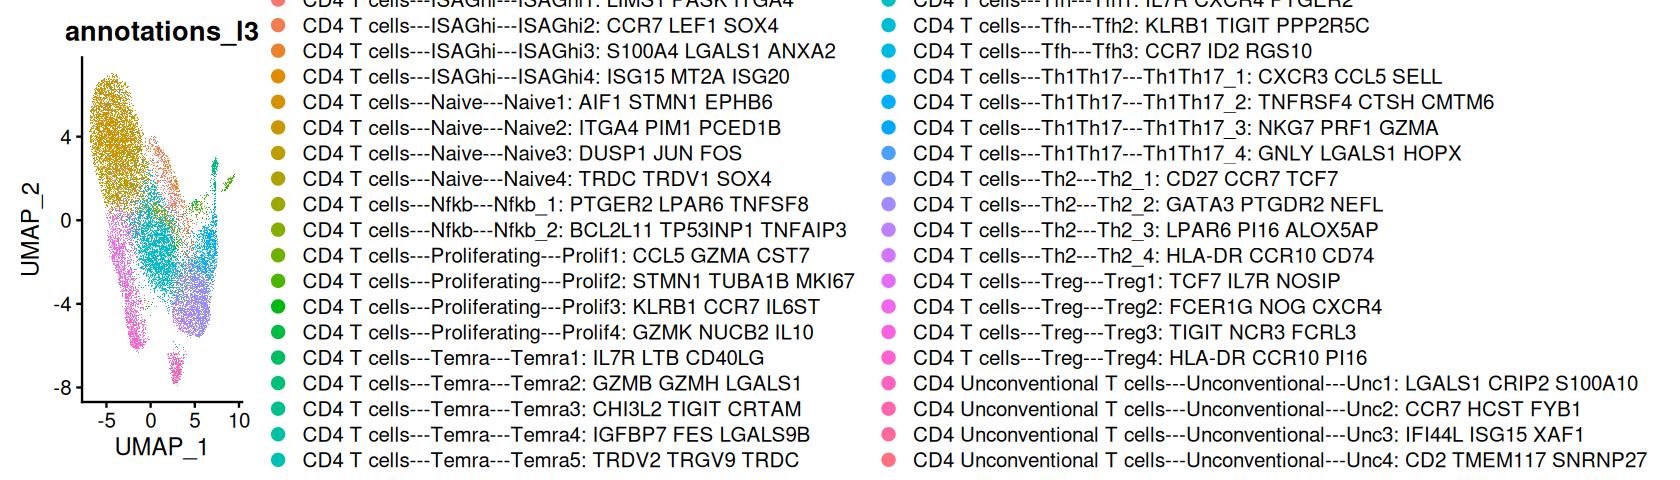

In [79]:
options(repr.plot.width = 14, repr.plot.height = 4)
DimPlot(cd4_l1_full, group.by = "annotations_l3", raster = T)

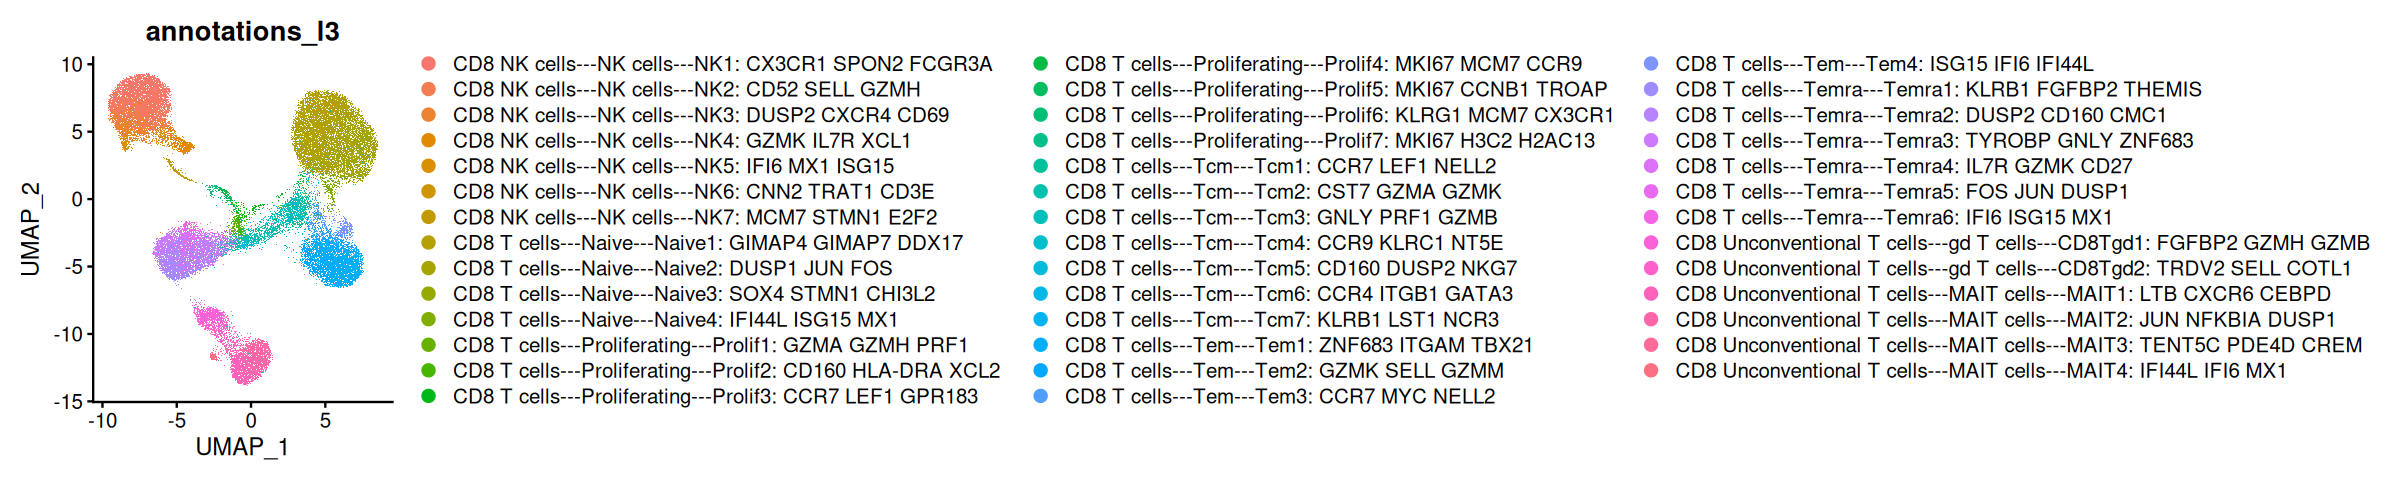

In [81]:
options(repr.plot.height = 4, repr.plot.width = 20)

DimPlot(cd8_l1_full, group.by = "annotations_l3", raster = T)

In [ ]:
full  <- merge(cd4_l1_full, cd8_l1_full)

In [ ]:
full@meta.data  <- full@meta.data  %>% 
mutate(annotations_l2  = gsub(pattern = " T cells", replacement = "", x = annotations_l3))  %>% 
separate(annotations_l2, into = c("annotations_l2", NA), sep = ":")  %>% 
mutate(annotations_l2  = gsub(pattern = "Unconventional_CD8 Unc", replacement = "CD8_Unc", x = annotations_l2))  %>% 
mutate(annotations_l2  = gsub(pattern = "Unconventional_Unc", replacement = "CD4_Unc_", x = annotations_l2))   %>% 
separate(annotations_l2, into = c("Level1", "Level2",NA,NA), sep = "_")  


In [ ]:
full$annotations_l2   <- paste(full$Level1, full$Level2)

In [ ]:
full$annotations_l2  %>% table

In [ ]:
full$Sample_char  %>% table

In [ ]:
full@meta.data  %>% colnames

In [ ]:
seurat_meta_data <- full@meta.data


# Create grouped dataframe, calculate the frequencies of clusters
df3  <- seurat_meta_data %>% 
  group_by(Sample_char, annotations_l2) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
  mutate(freq = n / sum(n))  %>% 
dplyr::select(-n)  %>% 
ungroup   %>% 
pivot_wider(names_from = "annotations_l2", values_from = "freq", values_fill = 0) 
df4  <- left_join((full@meta.data %>% dplyr::select(Sample_char) %>% unique), df3)
df4[is.na(df4)] <- 0



In [82]:
freq_cd4

Sample_ID,annotations,annot_l1,annot_l2,n,Condition,Condition2,Disease,Sex,Age,⋯,Time,Experiment_ID,Level,freq_from_total,Parent_annotation,total_per_patient,freq_from_parent,pct_from_total,pct_from_parent,Main
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
178,CD4 T cells,CD4 T cells,NA,785,Dia T0,Part_remission_1,Dia,M,3.7,⋯,T0,Exp10,L1,0.988664987,CD4,NA,NA,98.8664987,NA,CD4
178,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,9,Dia T0,Part_remission_1,Dia,M,3.7,⋯,T0,Exp10,L1,0.011335013,CD4,NA,NA,1.1335013,NA,CD4
181,CD4 T cells,CD4 T cells,NA,763,Dia T0,Part_remission_0,Dia,F,1.4,⋯,T0,Exp10,L1,0.990909091,CD4,NA,NA,99.0909091,NA,CD4
181,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,7,Dia T0,Part_remission_0,Dia,F,1.4,⋯,T0,Exp10,L1,0.009090909,CD4,NA,NA,0.9090909,NA,CD4
179,CD4 T cells,CD4 T cells,NA,776,Dia T0,Part_remission_1,Dia,M,9.4,⋯,T0,Exp10,L1,0.989795918,CD4,NA,NA,98.9795918,NA,CD4
179,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,8,Dia T0,Part_remission_1,Dia,M,9.4,⋯,T0,Exp10,L1,0.010204082,CD4,NA,NA,1.0204082,NA,CD4
183,CD4 T cells,CD4 T cells,NA,791,Dia T0,Part_remission_1,Dia,F,11.0,⋯,T0,Exp10,L1,0.992471769,CD4,NA,NA,99.2471769,NA,CD4
183,CD4 Unconventional T cells,CD4 Unconventional T cells,NA,6,Dia T0,Part_remission_1,Dia,F,11.0,⋯,T0,Exp10,L1,0.007528231,CD4,NA,NA,0.7528231,NA,CD4
182,CD4 T cells,CD4 T cells,NA,776,Dia T0,Part_remission_1,Dia,F,7.8,⋯,T0,Exp10,L1,0.996148909,CD4,NA,NA,99.6148909,NA,CD4


In [ ]:
model_table_dia_t0_ctrl_t0  <- df4  %>% separate(Sample_char, 
                                                 into = c("Patient_ID", "Disease", "Time", "Age_group", "Sex", "Exp"),
                                                remove = F, sep = " ")  %>% 
dplyr::filter(Time == "T0" & Exp %in% c("Exp16", "Exp18", "Exp19", "Exp20") & Disease != "Pre-Dia")

In [ ]:
colnames(model_table_dia_t0_ctrl_t0)

In [ ]:
colnames(model_table_dia_t0_ctrl_t0)  <- janitor::make_clean_names(colnames(model_table_dia_t0_ctrl_t0))

In [ ]:
colnames(model_table_dia_t0_ctrl_t0)

In [ ]:
model_table_dia_t0_ctrl_t0  <- model_table_dia_t0_ctrl_t0  %>% mutate_at(8:24, as.numeric)

In [ ]:
model_table_dia_t0_ctrl_t0 <- model_table_dia_t0_ctrl_t0  %>% mutate_at(c(3,5,6), as.factor)

In [ ]:
binom.glm <- glm(disease ~ sex  + cd4_proliferating + cd4_temra + cd4_tfh + 
cd4_th1 + cd4_th17 + cd4_th2 + cd4_treg + cd4_unc + cd8_naive + cd8_proliferating + 
                 cd8_tcm + cd8_tem + cd8_temra + cd8_unc + nk_cells_nk -1,
                 data = model_table_dia_t0_ctrl_t0, family = binomial)

In [ ]:
binom.glm

In [ ]:
summary(binom.glm)

In [ ]:
Explained_variance = (84.564 - 54.524) / 84.564
Explained_variance

In [ ]:
pchisq(54.524, 49, lower.tail = FALSE)

In [ ]:
res  <- coef(summary(binom.glm))  %>% as.data.frame()
colnames(res)  <- c("estimate", "std.error", "z", "p")
res$term  <- rownames(res)

In [ ]:
res

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)

res %>%
dplyr::filter(!(term %in% c("Age", "SexM", "SexF", "RiskHLA")))  %>% 
  mutate(upper = estimate + 1.96 * std.error,
         lower = estimate - 1.96 * std.error) %>%
  mutate(across(all_of(c(
    "estimate", "lower", "upper"
  )), exp)) %>%
  mutate(upper = ifelse(upper > 5, 4.9999, upper)) %>%
  arrange(estimate) %>%
mutate(term = factor(term, unique(term)))  %>% 
  ggplot(aes(estimate, term, color = estimate > 1)) +
  geom_vline(xintercept = 1, color = "gray75") +
  geom_linerange(aes(xmin = lower, xmax = upper),
                 size = 1.5,
                 alpha = 0.5) +
  geom_point(size = 4) +
  theme_minimal(base_size = 16) +
  scale_color_manual(values = c("green4", "red3"), guide = "none") +
  labs(title = "", y = NULL,
       x = "Probability \n(95% Confidence Intervals)") +
  theme(axis.text.y = element_text(hjust = 0, size = 18),
        panel.grid = element_blank())